# Projet 6 : Analysez les ventes d'une librairie avec R ou Python

# Analyse des données

L'analyse des données pour ce projet compte 2 parties. 

La première est une analyse des différents indicateurs de vente :
- Le chiffre d'affaires (chiffres, indicateurs graphiques, évolution dans le temps, moyennes mobiles, par catégorie)
- L'évolution du nombre d'achats
- Les produits (top, flop ventes, répartition par prix, répartition par catégorie, courbe de lorenz)
- Les clients (CA par client via une courbe de lorenz, répartition de l'âge)

La deuxième est une analyse plus précise sur le comportement des clients en ligne, où on étudiera les liens entre des variables via plusieurs analyses bivariées :
- Lien entre le genre du client et les catégories de livres achetés (tableau de contingence, test du chi2)
- Lien entre l’âge des clients et le montant total des achats (coefficient de pearson, test de régression)
- Lien entre l’âge des clients et la fréquence d’achat (coefficient de pearson, test de régression)
- Lien entre l’âge des clients et la taille du panier moyen (coefficient de pearson, test de régression)
- Lien entre l’âge des clients et et les catégories des livres achetés (test de normalité sur chaque sous groupe, test d'égalité des variances, test d'égalité des moyennes, test de l'Anova)

Dans un premier temps, on fera une analyse univariée et on déterminera si la distribution de nos variables suit une loi de probabilité (normale, Bernouilli). On établira ensuite un test statistique et on fera nos analyses bivariées en utilisant les méthodes de la régression linéaire, de l'anova ou du chi2 en fonction des cas.

## Sommaire <a id='sommaire'></a>
<ol> <li><a href="#partie_1">Partie 1 : Analyse des différents indicateurs de vente</a></li>
    <ol>
        <li><a href="#ca">Le Chiffre d'affaires</a></li> 
        <li><a href="#ventes">Le Nombre de Ventes</a></li>
        <li><a href="#produits">Les Produits</a></li> 
        <li><a href="#clients">Les Clients</a></li> 
    </ol>
    <li><a href="#partie_2">Partie 2 : Analyses bivariées</a></li>
        <ol>
        <li><a href="#genre_categ">Lien entre le genre du client et les catégories de livres achetés</a></li> 
        <li><a href="#age_montant">Lien entre l’âge des clients et le montant total des achats</a></li> 
        <li><a href="#age_frequence">Lien entre l’âge des clients et la fréquence d’achat</a></li>
        <li><a href="#age_panier">Lien entre l’âge des clients et la taille du panier moyen</a></li>
        <li><a href="#age_categ">Lien entre l’âge des clients et et les catégories des livres achetés</a></li>
    </ol>
</ol>

## Import des librairies

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats as st
import datetime as dt
import statsmodels.api as sm

import warnings

folder = 'D:/Data_Analyst_Projet/Projet 6/Donnees python/'

## Import du fichier

In [2]:
# on importe le fichier en prenant pour index les dates
df=pd.read_csv(folder+'global.csv', index_col='date', parse_dates=True)

In [3]:
df.head()

,id_prod,session_id,client_id,mois,price,categ,sex,birth,age
date,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,2022-05,4.18,0,f,1986,37
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,2022-02,15.99,1,m,1988,35
2022-06-18 15:44:33.155329,0_1277,s_225667,c_6714,2022-06,7.99,0,f,1968,55
2021-06-24 04:19:29.835891,2_209,s_52962,c_6941,2021-06,69.99,2,m,2000,23
2023-01-11 08:22:08.194479,0_1509,s_325227,c_4232,2023-01,4.99,0,m,1980,43


<a id='partie_1' ></a>
# Partie 1 : Analyse des différents indicateurs de vente<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

## Exploration

In [164]:
df.shape

(679332, 14)

In [5]:
df.info()
# categ et sex ne sont plus de type category, je vais les remodifier

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679332 entries, 2022-05-20 13:21:29.043970 to 2022-09-28 01:12:01.973763
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   session_id  679332 non-null  object 
 2   client_id   679332 non-null  object 
 3   mois        679332 non-null  object 
 4   price       679332 non-null  float64
 5   categ       679332 non-null  int64  
 6   sex         679332 non-null  object 
 7   birth       679332 non-null  int64  
 8   age         679332 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 51.8+ MB


In [6]:
df.describe(include='all')

,id_prod,session_id,client_id,mois,price,categ,sex,birth,age
count,679332,679332,679332,679332,679332.000000,679332.000000,679332,679332.000000,679332.000000
unique,3266,342315,8600,24,NaN,NaN,2,NaN,NaN
top,1_369,s_118668,c_1609,2021-09,NaN,NaN,m,NaN,NaN
freq,2252,14,25488,33326,NaN,NaN,340930,NaN,NaN
mean,NaN,NaN,NaN,NaN,17.452557,0.441809,NaN,1977.811139,45.188861
std,NaN,NaN,NaN,NaN,18.326428,0.594998,NaN,13.574553,13.574553
min,NaN,NaN,NaN,NaN,0.620000,0.000000,NaN,1929.000000,19.000000
25%,NaN,NaN,NaN,NaN,8.870000,0.000000,NaN,1970.000000,36.000000
50%,NaN,NaN,NaN,NaN,13.990000,0.000000,NaN,1980.000000,43.000000
75%,NaN,NaN,NaN,NaN,18.990000,1.000000,NaN,1987.000000,53.000000


In [7]:
# mise au type category
df[['categ', 'sex']]=df[['categ', 'sex']].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679332 entries, 2022-05-20 13:21:29.043970 to 2022-09-28 01:12:01.973763
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679332 non-null  object  
 1   session_id  679332 non-null  object  
 2   client_id   679332 non-null  object  
 3   mois        679332 non-null  object  
 4   price       679332 non-null  float64 
 5   categ       679332 non-null  category
 6   sex         679332 non-null  category
 7   birth       679332 non-null  int64   
 8   age         679332 non-null  int64   
dtypes: category(2), float64(1), int64(2), object(4)
memory usage: 42.8+ MB


<a id='ca' ></a>
## Analyse du Chiffre d'affaires<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [9]:
df.head()

,id_prod,session_id,client_id,mois,price,categ,sex,birth,age
date,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,2022-05,4.18,0,f,1986,37
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,2022-02,15.99,1,m,1988,35
2022-06-18 15:44:33.155329,0_1277,s_225667,c_6714,2022-06,7.99,0,f,1968,55
2021-06-24 04:19:29.835891,2_209,s_52962,c_6941,2021-06,69.99,2,m,2000,23
2023-01-11 08:22:08.194479,0_1509,s_325227,c_4232,2023-01,4.99,0,m,1980,43


In [10]:
df.loc[df.sort_index().index, ['categ', 'price']].resample('Y').sum().reset_index()

,date,price
0,2021-12-31,4771752.24
1,2022-12-31,6109958.61
2,2023-12-31,974369.27


### Chiffre d'affaires par année

In [11]:
ca_annee=df.loc[df.sort_index().index, ['price']].resample('Y').sum().reset_index()
ca_annee['date']=ca_annee['date'].dt.year
ca_annee

,date,price
0,2021,4771752.24
1,2022,6109958.61
2,2023,974369.27


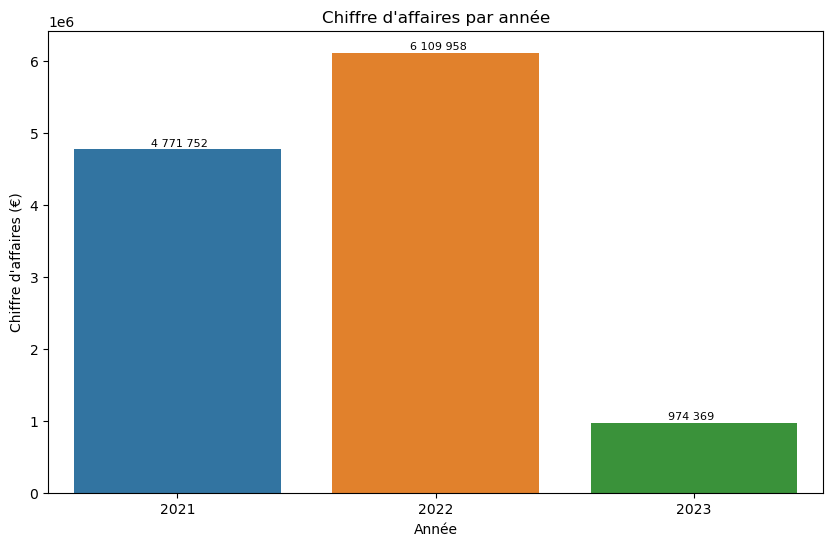

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=ca_annee['date'], y=ca_annee['price'])
plt.title("Chiffre d'affaires par année")
plt.xlabel('Année')
plt.ylabel("Chiffre d'affaires (€)")

for i in range(len(ca_annee['price'])):
    plt.text(i-0.1, ca_annee.iloc[i,1]+4e4, 
             '{:,}'.format(int(ca_annee.iloc[i,1])).replace(',',' '), fontsize=8)

### Chiffre d'affaires par année par catégorie

In [13]:
# on pivote par catégorie pour comparer les chiffres d'affaires par catégories
pivot_categ=df.pivot_table(index='date', columns='categ', values='price', aggfunc='sum')
ca_annee_categ=pivot_categ.loc[pivot_categ.sort_index().index, [0, 1, 2]].resample('Y').sum().reset_index()
ca_annee_categ['date']=ca_annee_categ['date'].dt.year
ca_annee_categ

categ,date,0,1,2
0,2021,1883946.13,1777995.85,1109810.26
1,2022,2194247.26,2485275.19,1430436.16
2,2023,343889.02,390451.65,240028.60


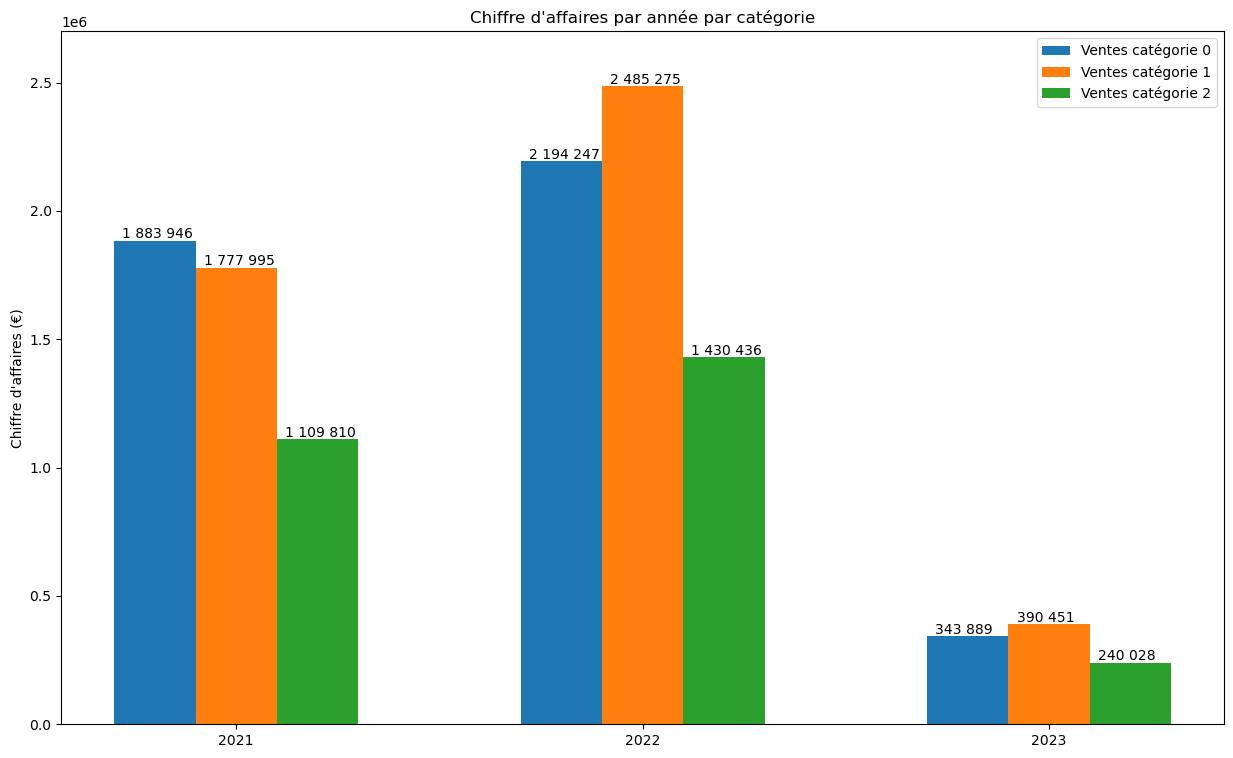

In [14]:
data2=ca_annee_categ

plt.figure(figsize=(15, 9))

plt.ylim(0,2700000)
plt.yticks(np.arange(0, 2700000, 500000))

plt.xticks(data2.index, ['2021', '2022', '2023'])

plt.title("Chiffre d'affaires par année par catégorie")

plt.bar(x=data2.index-0.2, height=data2[0], width=0.2, label='Ventes catégorie 0')
plt.bar(x=data2.index, height=data2[1], width=0.2, label='Ventes catégorie 1')
plt.bar(x=data2.index+0.2, height=data2[2], width=0.2, label='Ventes catégorie 2')

plt.ylabel("Chiffre d'affaires (€)")

plt.legend()

for i in range(3):
    plt.text(i-0.28, data2[0][i]+1e4, '{:,}'.format(int(data2[0][i])).replace(',',' '))
    plt.text(i-0.08, data2[1][i]+1e4, '{:,}'.format(int(data2[1][i])).replace(',',' '))
    plt.text(i+0.12, data2[2][i]+1e4, '{:,}'.format(int(data2[2][i])).replace(',',' '))

plt.show()

### Chiffre d'affaires par année par catégorie, Diagrammes empilés

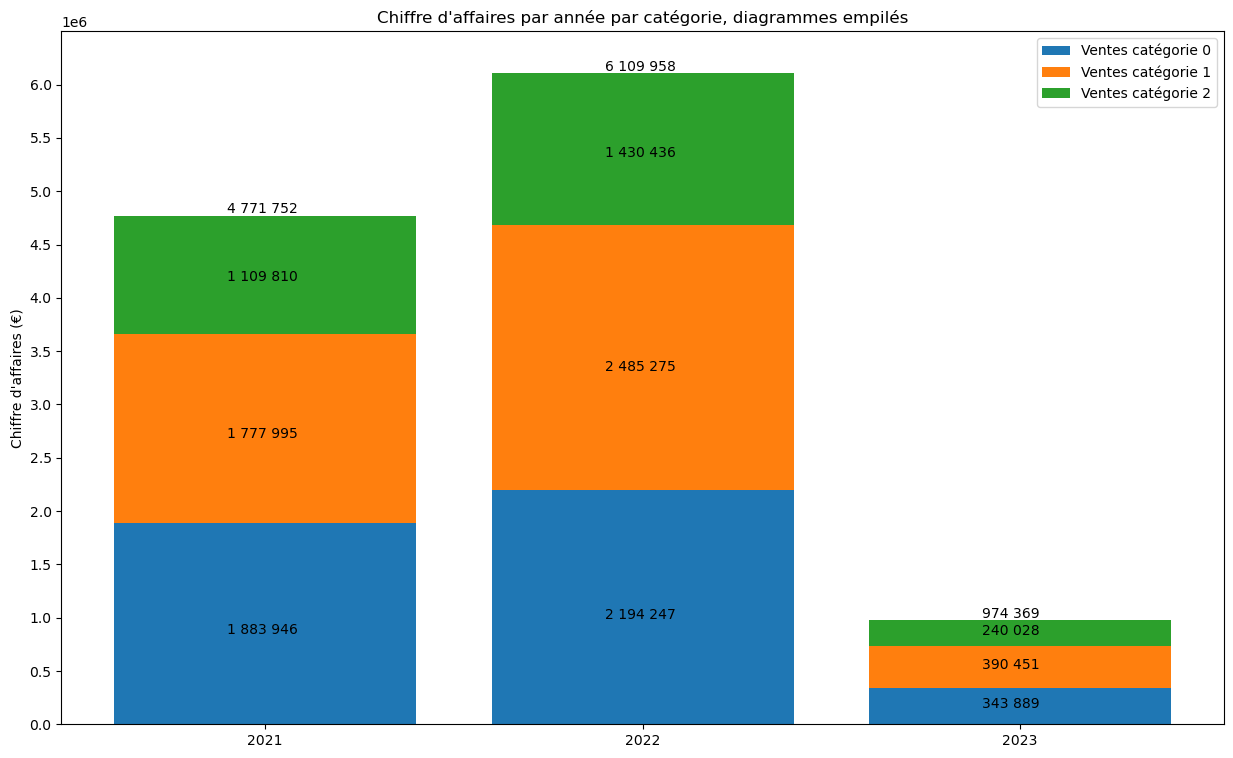

In [15]:
data2=ca_annee_categ

plt.figure(figsize=(15, 9))

plt.ylim(0,6500000)
plt.yticks(np.arange(0, 6500000, 500000))

plt.xticks(data2.index, ['2021', '2022', '2023'])

plt.title("Chiffre d'affaires par année par catégorie, diagrammes empilés")

plt.bar(x=data2.index, height=data2[0], width=0.8, label='Ventes catégorie 0')
plt.bar(x=data2.index, height=data2[1], bottom=data2[0], width=0.8, label='Ventes catégorie 1')
plt.bar(x=data2.index, height=data2[2], bottom=data2[0]+data2[1], width=0.8, label='Ventes catégorie 2')

plt.ylabel("Chiffre d'affaires (€)")

plt.legend()

for i in range(3):
    plt.text(i-0.1, 0.45*data2[0][i], '{:,}'.format(int(data2[0][i])).replace(',',' '))
    plt.text(i-0.1, 0.45*data2[1][i]+data2[0][i], '{:,}'.format(int(data2[1][i])).replace(',',' '))
    plt.text(i-0.1, 0.45*data2[2][i]+data2[0][i]+data2[1][i], '{:,}'.format(int(data2[2][i])).replace(',',' '))
    plt.text(i-0.1, data2[2][i]+data2[0][i]+data2[1][i]+2e4,
             '{:,}'.format(int(data2[2][i]+data2[0][i]+data2[1][i])).replace(',',' '))

plt.show()

### Chiffre d'affaires par mois

In [16]:
ca_mois=df.loc[df.sort_index().index, ['price']].resample('M').sum().reset_index()
ca_mois['date']=ca_mois['date'].dt.strftime('%Y-%m')
ca_mois

,date,price
0,2021-03,482536.37
1,2021-04,476258.26
2,2021-05,493028.59
3,2021-06,484163.04
4,2021-07,482877.96
5,2021-08,482380.55
6,2021-09,507368.36
7,2021-10,320873.22
8,2021-11,516274.13
9,2021-12,525991.76


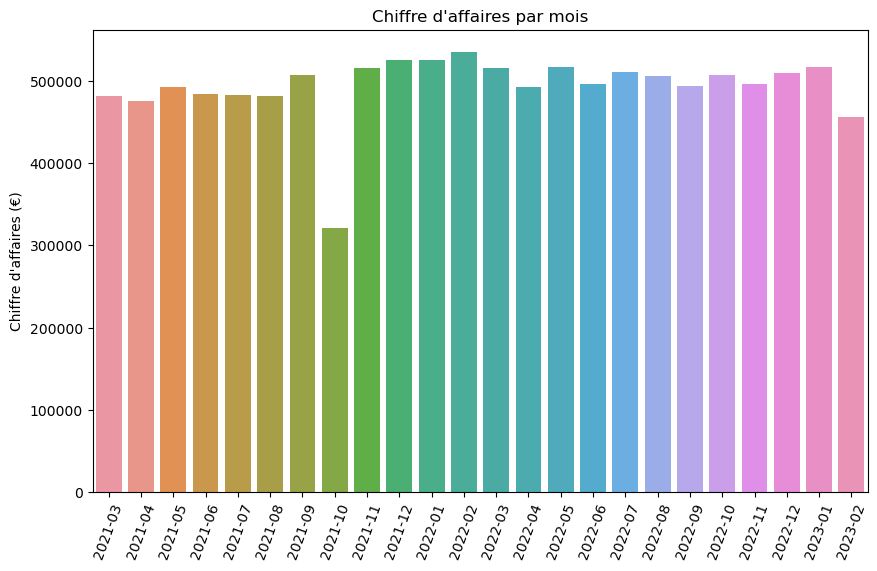

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=ca_mois['date'], y=ca_mois['price'])
plt.title("Chiffre d'affaires par mois")
plt.xlabel(None)
plt.ylabel("Chiffre d'affaires (€)")
plt.xticks(rotation=70);

### Evolution du chiffre d'affaires, totale et par catégorie

In [18]:
# on pivote par catégorie pour comparer les chiffres d'affaires par catégories
pivot_categ=df.pivot_table(index='date', columns='categ', values='price', aggfunc='sum')
pivot_categ.loc[pivot_categ.sort_index().index, [0, 1, 2]].resample('M').sum()

categ,0,1,2
date,,,
2021-03-31,193724.93,186974.17,101837.27
2021-04-30,205371.42,156138.35,114748.49
2021-05-31,196271.84,165893.40,130863.35
2021-06-30,168017.63,189162.04,126983.37
2021-07-31,144793.35,188523.27,149561.34
2021-08-31,167833.38,162991.38,151555.79
2021-09-30,246481.59,190613.78,70272.99
2021-10-31,199325.31,33762.32,87785.59
2021-11-30,156015.96,252910.39,107347.78


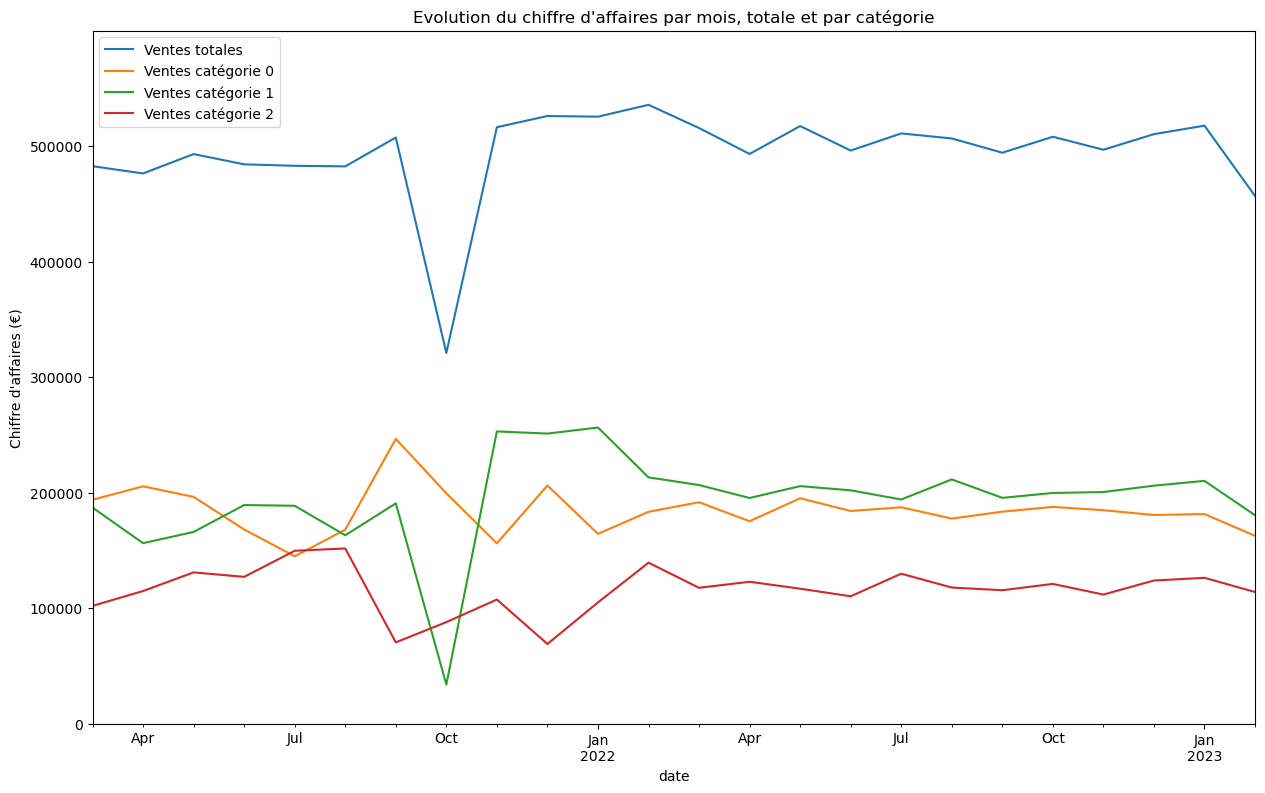

In [19]:
data=df.loc[df.sort_index().index,'price'].resample('M').sum()
data2=pivot_categ.loc[pivot_categ.sort_index().index, [0, 1, 2]].resample('M').sum()


plt.figure(figsize=(15,9))

plt.ylim(0,600000)
plt.yticks(np.arange(0, 600000, 100000))

plt.title("Evolution du chiffre d'affaires par mois, totale et par catégorie")

data.plot(label='Ventes totales')
data2[0].plot(label='Ventes catégorie 0')
data2[1].plot(label='Ventes catégorie 1')
data2[2].plot(label='Ventes catégorie 2')


plt.ylabel("Chiffre d'affaires (€)")

plt.legend()

plt.show()

### Chiffre d'affaires par mois par catégorie, sous forme de diagramme en barre

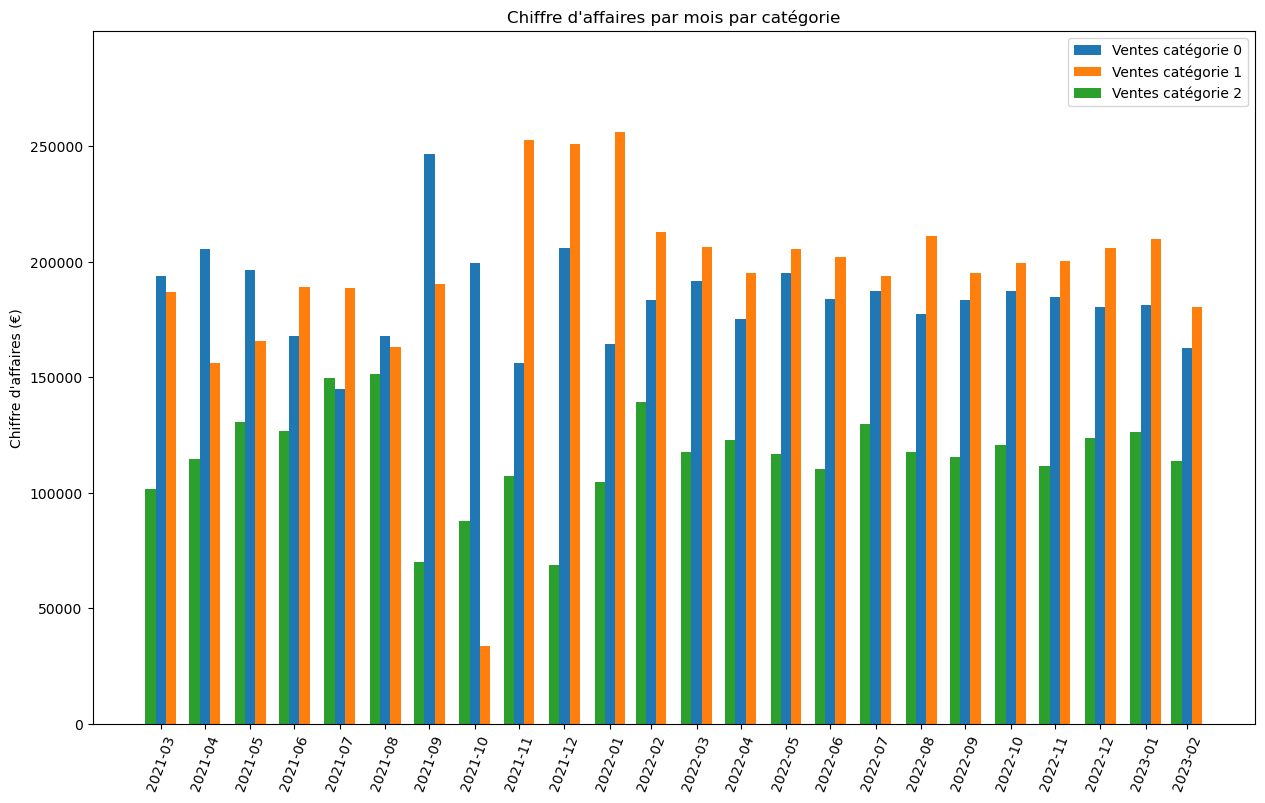

In [20]:
data=df.loc[df.sort_index().index,'price'].resample('M').sum()
data2=pivot_categ.loc[pivot_categ.sort_index().index, [0, 1, 2]].resample('M').sum()
mois=df['mois'].sort_values().unique()

plt.figure(figsize=(15,9))

plt.ylim(0,300000)
plt.yticks(np.arange(0, 300000, 50000))

plt.xticks(data2.index, mois, rotation=70)

plt.title("Chiffre d'affaires par mois par catégorie")

plt.bar(x=data2.index, height=data2[0], width=7, label='Ventes catégorie 0')
plt.bar(x=dt.timedelta(days=7)+data2.index, height=data2[1], width=7, label='Ventes catégorie 1')
plt.bar(x=data2.index-dt.timedelta(days=7), height=data2[2], width=7, label='Ventes catégorie 2')

plt.ylabel("Chiffre d'affaires (€)")

plt.legend()

plt.show()

### Diagrammes empilés par mois

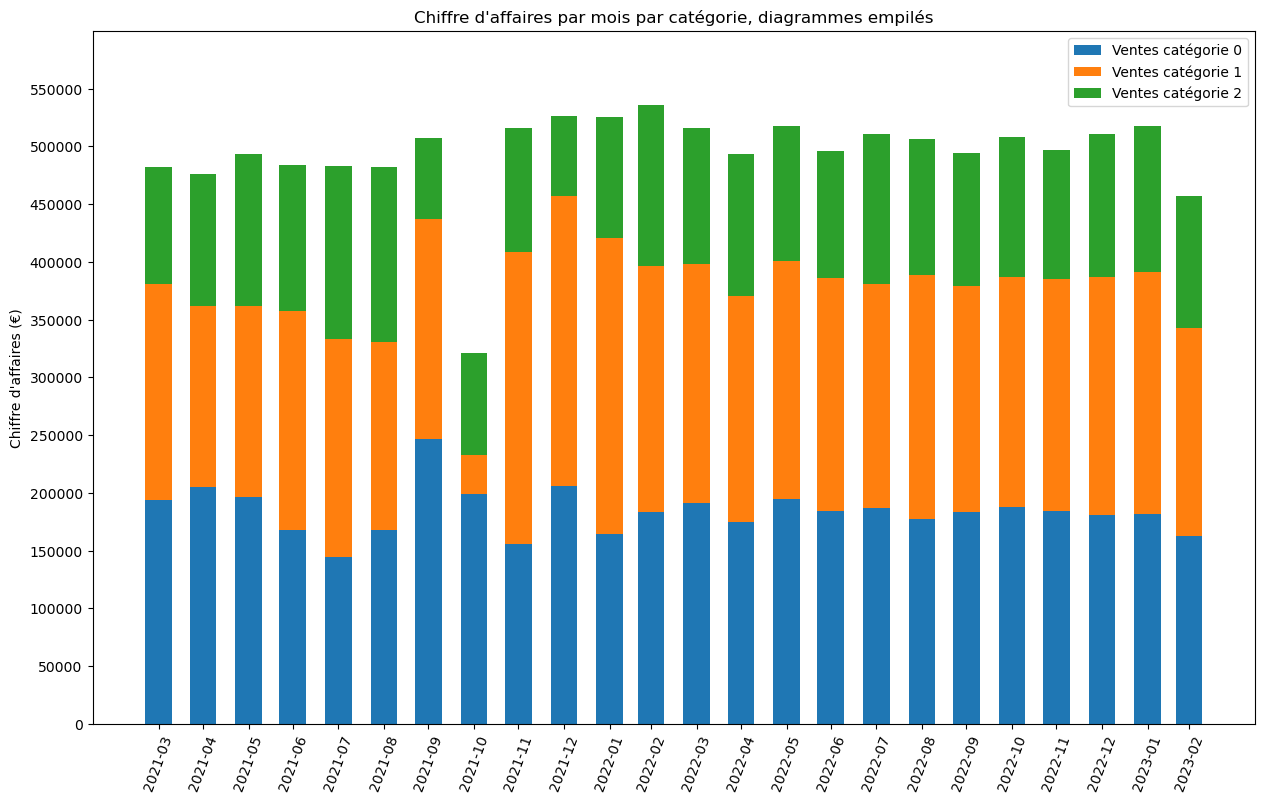

In [21]:
data=df.loc[df.sort_index().index,'price'].resample('M').sum()
data2=pivot_categ.loc[pivot_categ.sort_index().index, [0, 1, 2]].resample('M').sum()

plt.figure(figsize=(15,9))

plt.ylim(0,600000)
plt.yticks(np.arange(0, 600000, 50000))
plt.xticks(data2.index, mois, rotation=70)

plt.title("Chiffre d'affaires par mois par catégorie, diagrammes empilés")

plt.bar(x=data2.index, height=data2[0], width=18, label='Ventes catégorie 0')
plt.bar(x=data2.index, height=data2[1], bottom=data2[0], width=18, label='Ventes catégorie 1')
plt.bar(x=data2.index, height=data2[2], bottom=data2[0]+data2[1], width=18, label='Ventes catégorie 2')

plt.ylabel("Chiffre d'affaires (€)")

plt.legend()

plt.show()

<a id='ventes' ></a>
## Analyse du nombre de ventes<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

### Evolution du nombre de ventes par mois, totale et par catégorie

In [22]:
# Nombre total de ventes par mois
nb_vente_mois=df.loc[df.sort_index().index,['price']].resample('M').count().reset_index()
nb_vente_mois['date']=nb_vente_mois['date'].dt.strftime('%Y-%m')
nb_vente_mois

,date,price
0,2021-03,28610
1,2021-04,28457
2,2021-05,28293
3,2021-06,26857
4,2021-07,24742
5,2021-08,25659
6,2021-09,33326
7,2021-10,21606
8,2021-11,28321
9,2021-12,32464


''

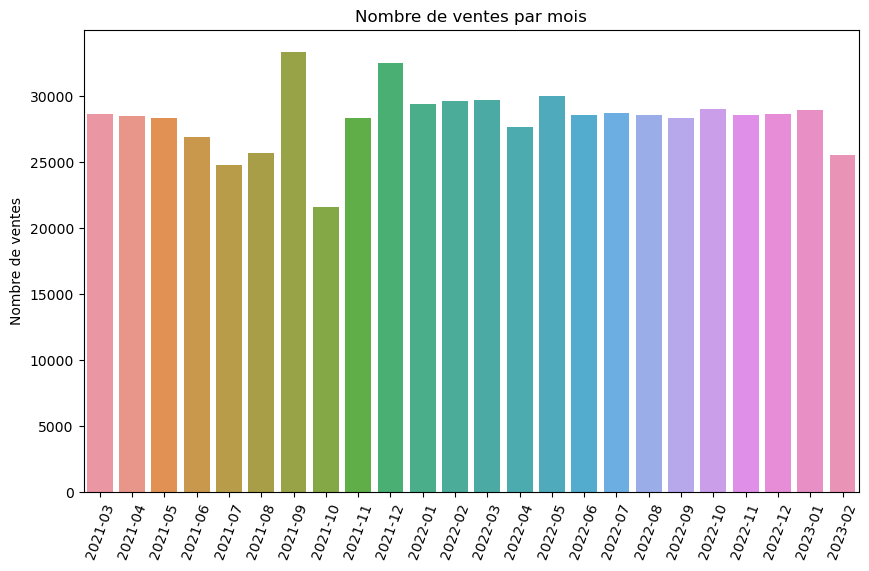

In [23]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=70)
sns.barplot(x=nb_vente_mois['date'], y=nb_vente_mois['price'])
plt.title("Nombre de ventes par mois")
plt.xlabel(None)
plt.ylabel("Nombre de ventes")
;

In [24]:
# Nombre de ventes par mois par catégorie
pivot_categ2=df.pivot_table(index='date', columns='categ', values='price', aggfunc='count')
pivot_categ2.loc[pivot_categ2.sort_index().index, [0, 1, 2]].resample('M').sum()

categ,0,1,2
date,,,
2021-03-31,18140,9134,1336
2021-04-30,19356,7579,1522
2021-05-31,18509,8107,1677
2021-06-30,15905,9264,1688
2021-07-31,13582,9169,1991
2021-08-31,15737,7954,1968
2021-09-30,23154,9268,904
2021-10-31,18769,1666,1171
2021-11-30,14610,12316,1395


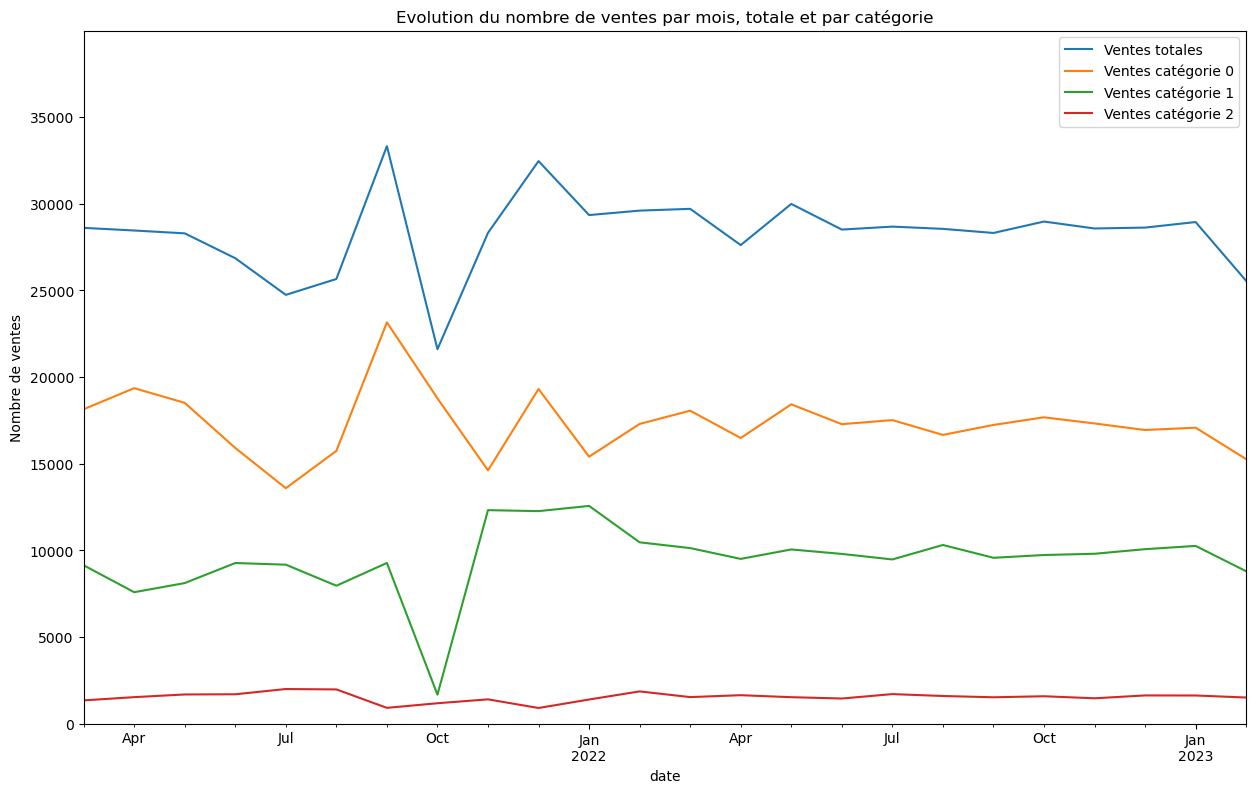

In [25]:
pivot_categ2=df.pivot_table(index='date', columns='categ', values='price', aggfunc='count')
data=df.loc[df.sort_index().index,'price'].resample('M').count()
data2=pivot_categ2.loc[pivot_categ2.sort_index().index, [0, 1, 2]].resample('M').sum()

plt.figure(figsize=(15,9))

plt.ylim(0,40000)
plt.yticks(np.arange(0, 40000, 5000))

plt.title("Evolution du nombre de ventes par mois, totale et par catégorie")

data.plot(label='Ventes totales')
data2[0].plot(label='Ventes catégorie 0')
data2[1].plot(label='Ventes catégorie 1')
data2[2].plot(label='Ventes catégorie 2')


plt.ylabel("Nombre de ventes")

plt.legend()

plt.show()

### Nombre de ventes par mois, par catégorie sous forme de diagramme en barre

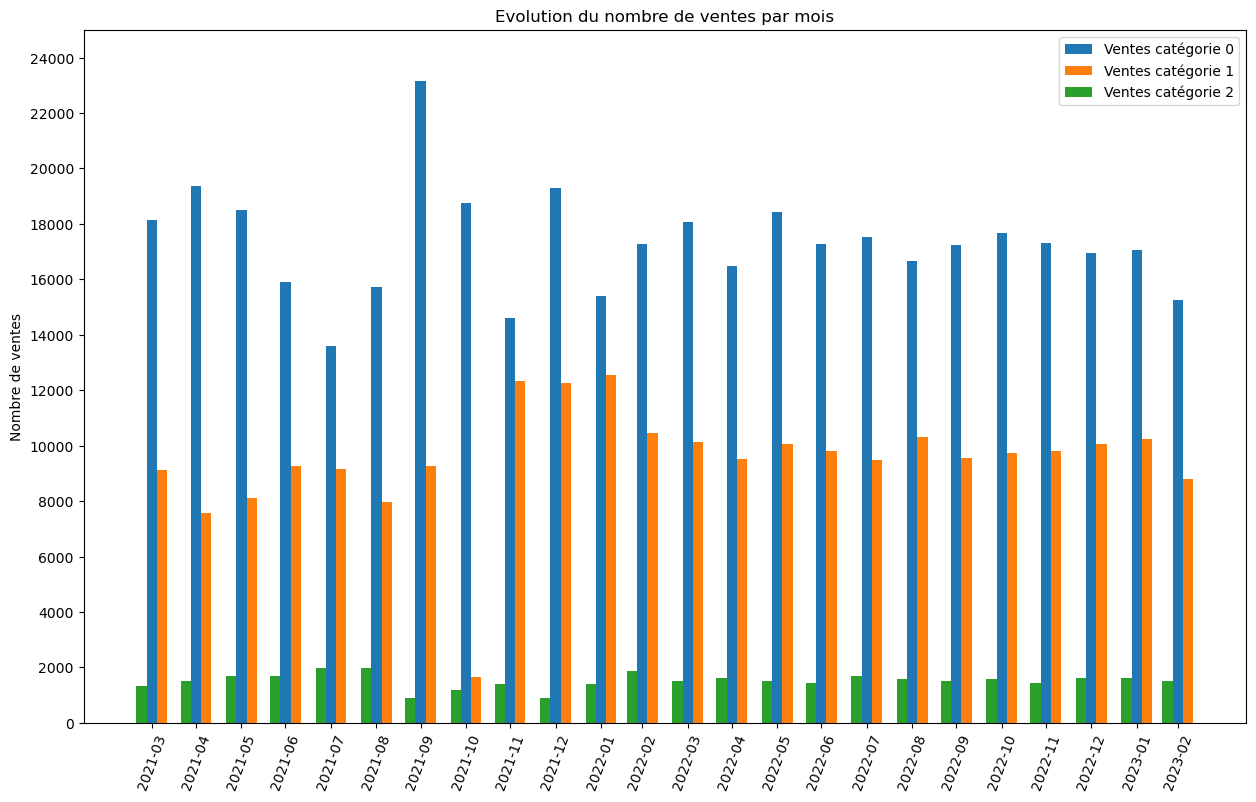

In [26]:
pivot_categ2=df.pivot_table(index='date', columns='categ', values='price', aggfunc='count')
data=df.loc[df.sort_index().index,'price'].resample('M').count()
data2=pivot_categ2.loc[pivot_categ2.sort_index().index, [0, 1, 2]].resample('M').sum()

plt.figure(figsize=(15,9))

plt.ylim(0, 25000)
plt.yticks(np.arange(0, 25000, 2000))
plt.xticks(data2.index, mois, rotation=70)

plt.title("Evolution du nombre de ventes par mois")

plt.bar(x=data2.index, height=data2[0], width=7, label='Ventes catégorie 0')
plt.bar(x=dt.timedelta(days=7)+data2.index, height=data2[1], width=7, label='Ventes catégorie 1')
plt.bar(x=data2.index-dt.timedelta(days=7), height=data2[2], width=7, label='Ventes catégorie 2')

plt.ylabel("Nombre de ventes")

plt.legend()

plt.show()

### Nombre de ventes par mois, par catégorie sous forme de diagramme en barre

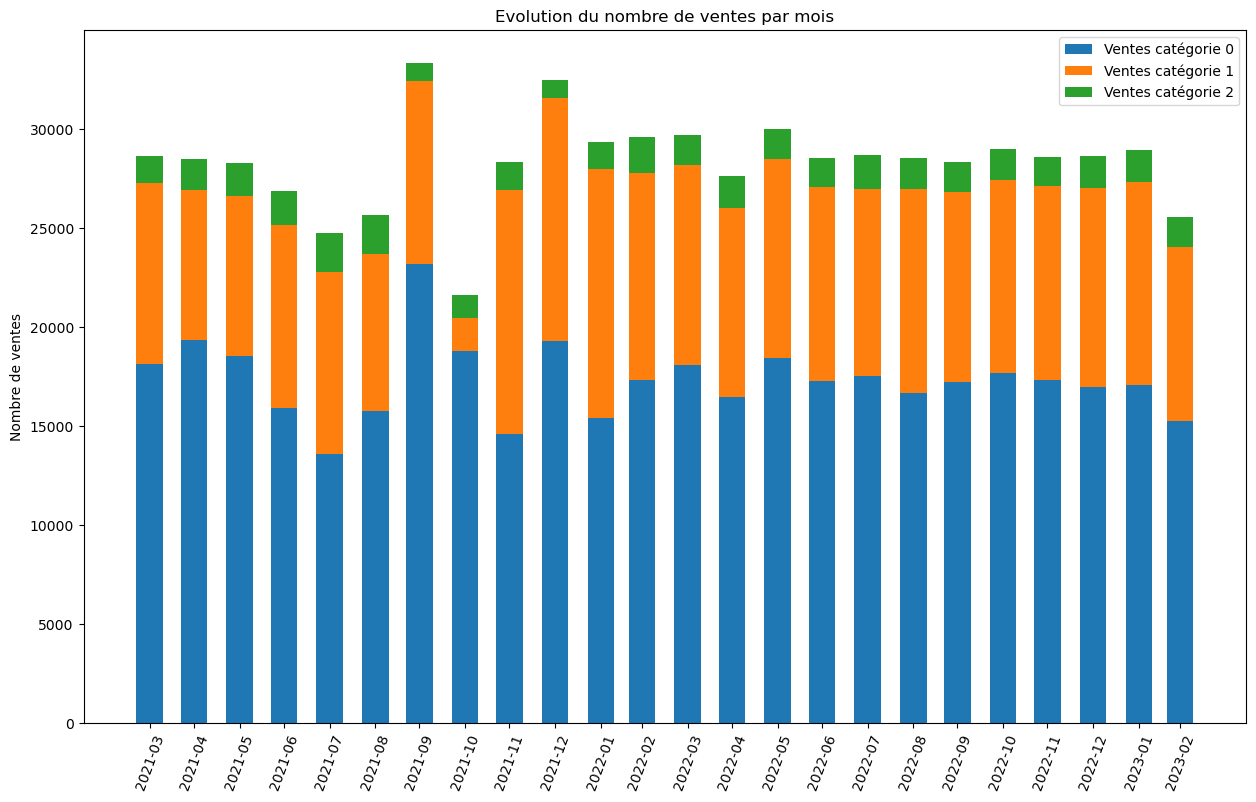

In [27]:
pivot_categ2=df.pivot_table(index='date', columns='categ', values='price', aggfunc='count')
data=df.loc[df.sort_index().index,'price'].resample('M').count()
data2=pivot_categ2.loc[pivot_categ2.sort_index().index, [0, 1, 2]].resample('M').sum()

plt.figure(figsize=(15,9))

plt.ylim(0, 35000)
plt.yticks(np.arange(0, 35000, 5000))
plt.xticks(data2.index, mois, rotation=70)

plt.title("Evolution du nombre de ventes par mois")

plt.bar(x=data2.index, height=data2[0], width=18, label='Ventes catégorie 0')
plt.bar(x=data2.index, height=data2[1], width=18, bottom=data2[0], label='Ventes catégorie 1')
plt.bar(x=data2.index, height=data2[2], width=18, bottom=data2[0]+data2[1], label='Ventes catégorie 2')

plt.ylabel("Nombre de ventes")

plt.legend()

plt.show()

<a id='produits' ></a>
## Analyse des Produits<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Nous allons maintenant créer un dataframe client en agrégeant les données pour chaque produit.

In [28]:
df.reset_index(drop=True, inplace=True)
df

,id_prod,session_id,client_id,mois,price,categ,sex,birth,age
0,0_1518,s_211425,c_103,2022-05,4.18,0,f,1986,37
1,1_251,s_158752,c_8534,2022-02,15.99,1,m,1988,35
2,0_1277,s_225667,c_6714,2022-06,7.99,0,f,1968,55
3,2_209,s_52962,c_6941,2021-06,69.99,2,m,2000,23
4,0_1509,s_325227,c_4232,2023-01,4.99,0,m,1980,43
...,...,...,...,...,...,...,...,...,...
679327,0_1551,s_150195,c_8489,2022-01,12.99,0,f,1951,72
679328,1_639,s_181434,c_4370,2022-03,10.99,1,f,1977,46
679329,0_1425,s_314704,c_304,2022-12,12.99,0,f,1988,35
679330,0_1994,s_63204,c_2227,2021-07,4.98,0,m,1986,37


In [29]:
# Agrégation par produit avec l'argent qu'il a rapporté et son nombre de ventes
produit=df.groupby('id_prod')['price'].agg(['sum', 'count']).reset_index()

In [30]:
# ajout price
produit['price']=produit['sum']/produit['count']

### Ajout categ au dataframe produit

In [31]:
# on récupère la catégorie grâce au premier caractère de id_prod
produit['categ']=produit['id_prod'].apply(lambda x : x[0])

In [32]:
produit['categ']=produit['categ'].astype('category')

In [33]:
produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id_prod  3266 non-null   object  
 1   sum      3266 non-null   float64 
 2   count    3266 non-null   int64   
 3   price    3266 non-null   float64 
 4   categ    3266 non-null   category
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 105.5+ KB


In [34]:
produit.head()

,id_prod,sum,count,price,categ
0,0_0,4657.50,1242,3.75,0
1,0_1,5352.13,487,10.99,0
2,0_10,394.90,22,17.95,0
3,0_100,61.80,3,20.60,0
4,0_1000,2954.88,432,6.84,0


### Top produits

In [35]:
# Top 20 des produits qui ont rapporté le plus
produit.sort_values('sum', ascending=False).head(20)

,id_prod,sum,count,price,categ
3097,2_159,94893.50,650,145.99,2
3071,2_135,69334.95,1005,68.99,2
3046,2_112,65407.76,968,67.57,2
3035,2_102,60736.78,1027,59.14,2
3153,2_209,56971.86,814,69.99,2
2620,1_395,54356.25,1875,28.99,1
2592,1_369,54025.48,2252,23.99,1
3044,2_110,53846.25,865,62.25,2
3202,2_39,53060.85,915,57.99,2
3105,2_166,52449.12,228,230.04,2


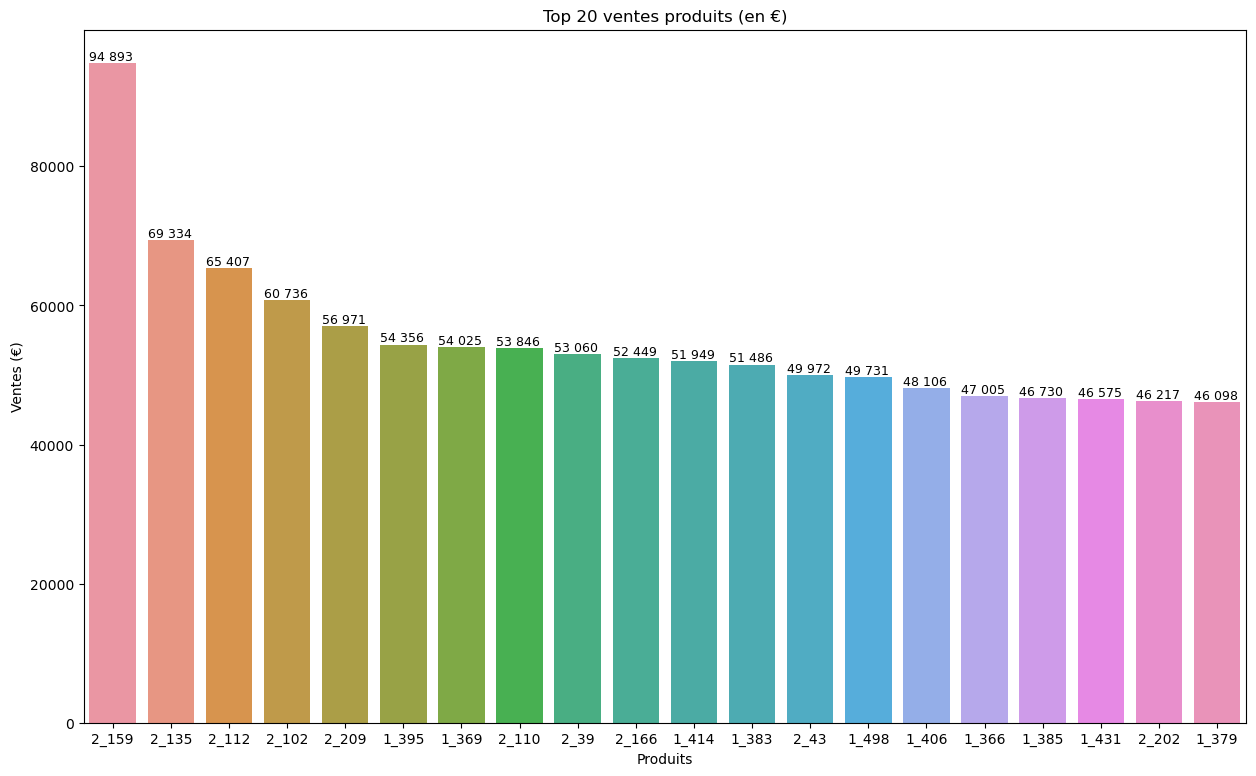

In [36]:
plt.figure(figsize=(15,9))

top20_ca=produit.sort_values('sum', ascending=False).head(20)
sns.barplot(x=top20_ca['id_prod'], y=top20_ca['sum'])

plt.title('Top 20 ventes produits (en €)')

plt.ylabel("Ventes (€)")
plt.xlabel("Produits")

for i in range(len(top20_ca)):
    plt.text(i-0.4, top20_ca.iloc[i,1] + 4e2, 
             '{:,}'.format(int(top20_ca.iloc[i,1])).replace(',',' '), fontsize=9)

plt.show()

In [37]:
# Top 20 des produits les plus vendus
produit.sort_values('count', ascending=False).head(20)

,id_prod,sum,count,price,categ
2592,1_369,54025.48,2252,23.99,1
2645,1_417,45947.11,2189,20.99,1
2642,1_414,51949.40,2180,23.83,1
2734,1_498,49731.36,2128,23.37,1
2654,1_425,35611.04,2096,16.99,1
2630,1_403,35260.40,1960,17.99,1
2640,1_412,32484.15,1951,16.65,1
2641,1_413,34990.55,1945,17.99,1
2633,1_406,48106.59,1939,24.81,1
2634,1_407,30940.65,1935,15.99,1


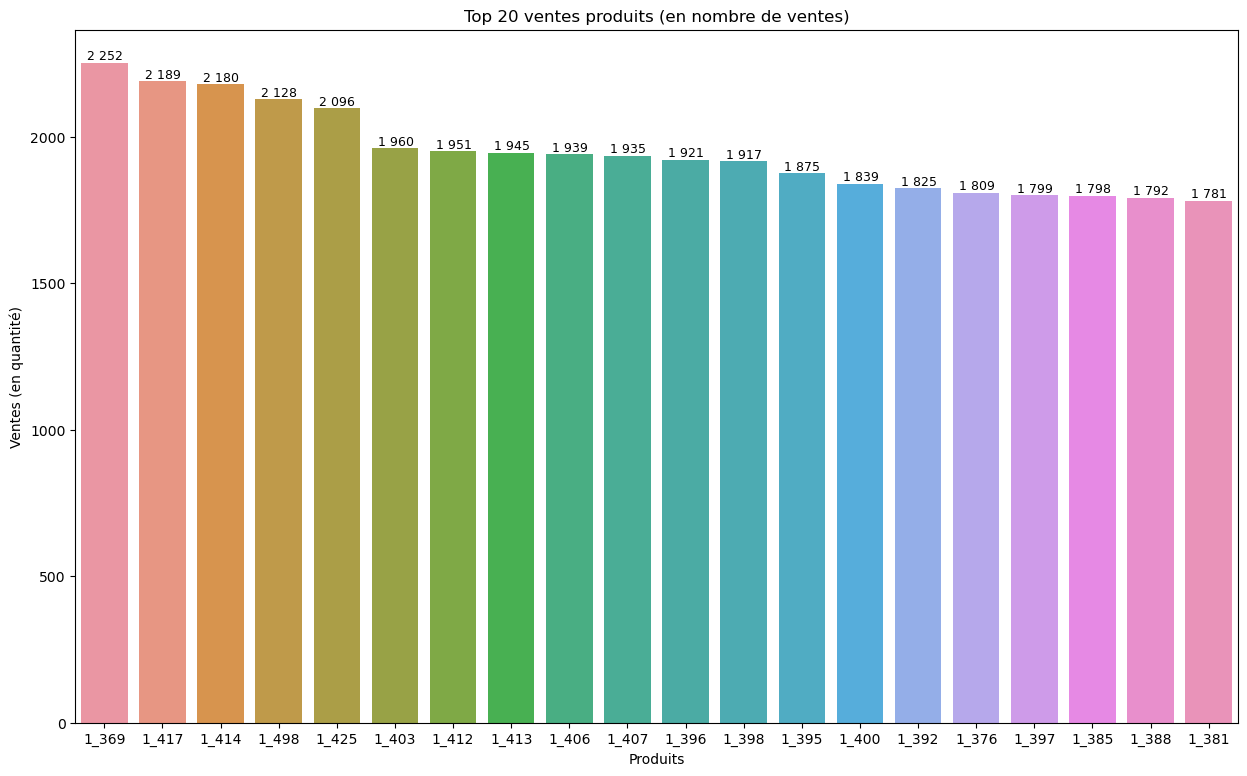

In [38]:
plt.figure(figsize=(15,9))

top20_vente=produit.sort_values('count', ascending=False).head(20)
sns.barplot(x=top20_vente['id_prod'], y=top20_vente['count'])

plt.title('Top 20 ventes produits (en nombre de ventes)')

plt.ylabel("Ventes (en quantité)")
plt.xlabel("Produits")

for i in range(len(top20_vente)):
    plt.text(i-0.3, top20_vente.iloc[i,2] + 10, 
             '{:,}'.format(int(top20_vente.iloc[i,2])).replace(',',' '), fontsize=9)

plt.show()

### Flop Produits

In [39]:
# Top 20 des produits qui ont rapporté le moins
produit.sort_values('sum').head(20)

,id_prod,sum,count,price,categ
595,0_1539,0.99,1,0.99,0
313,0_1284,1.38,1,1.38,0
719,0_1653,1.98,2,0.99,0
1785,0_541,1.99,1,1.99,0
2080,0_807,1.99,1,1.99,0
665,0_1601,1.99,1,1.99,0
802,0_1728,2.27,1,2.27,0
549,0_1498,2.48,1,2.48,0
2180,0_898,2.54,2,1.27,0
925,0_1840,2.56,2,1.28,0


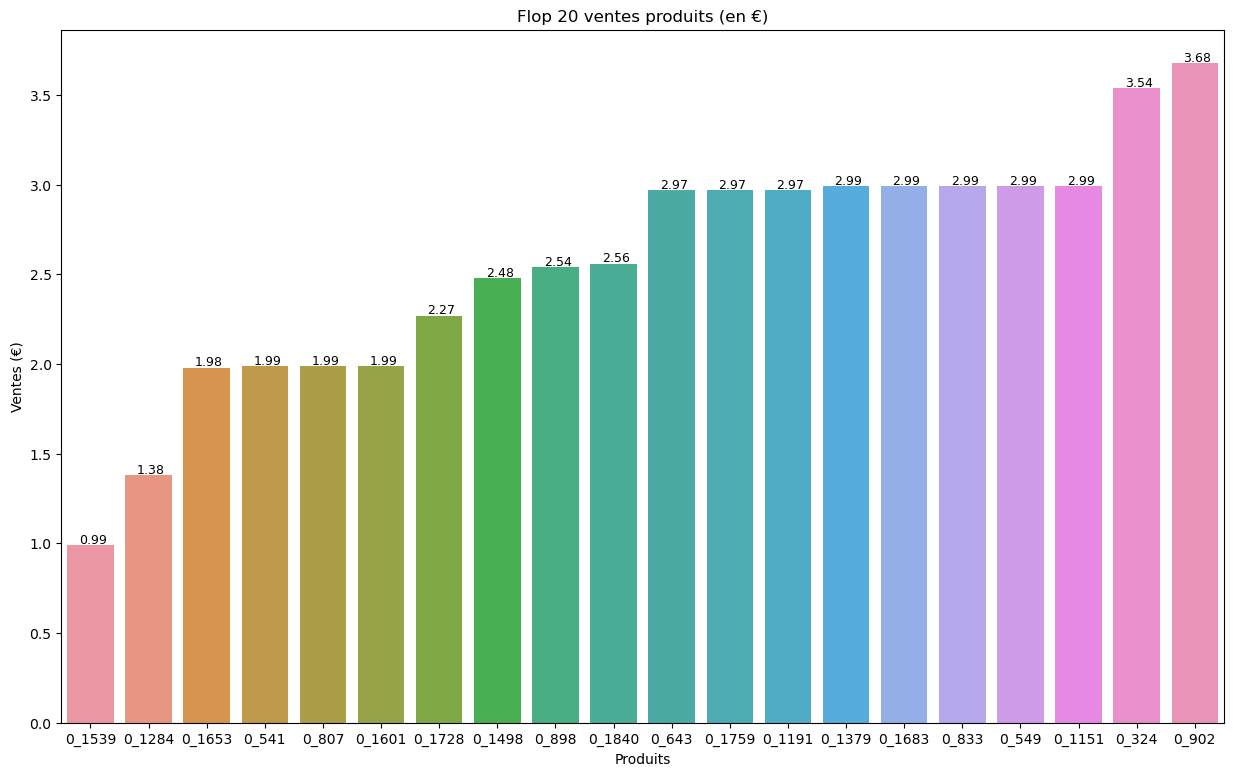

In [40]:
plt.figure(figsize=(15,9))

flop20_ca=produit.sort_values('sum').head(20)
sns.barplot(x=flop20_ca['id_prod'], y=flop20_ca['sum'])

plt.title('Flop 20 ventes produits (en €)')

plt.ylabel("Ventes (€)")
plt.xlabel("Produits")

for i in range(len(flop20_ca)):
    plt.text(i-0.2, flop20_ca.iloc[i,1]+0.01, 
             '{:,}'.format(round(flop20_ca.iloc[i,1],2)).replace(',',' '), fontsize=9)

plt.show()

In [41]:
# Top 20 des produits les moins vendus
produit.sort_values('count').head(20)

,id_prod,sum,count,price,categ
1793,0_549,2.99,1,2.99,0
1327,0_2201,20.99,1,20.99,0
3176,2_23,115.99,1,115.99,2
313,0_1284,1.38,1,1.38,0
752,0_1683,2.99,1,2.99,0
2109,0_833,2.99,1,2.99,0
3264,2_98,149.74,1,149.74,2
698,0_1633,24.99,1,24.99,0
665,0_1601,1.99,1,1.99,0
3248,2_81,86.99,1,86.99,2


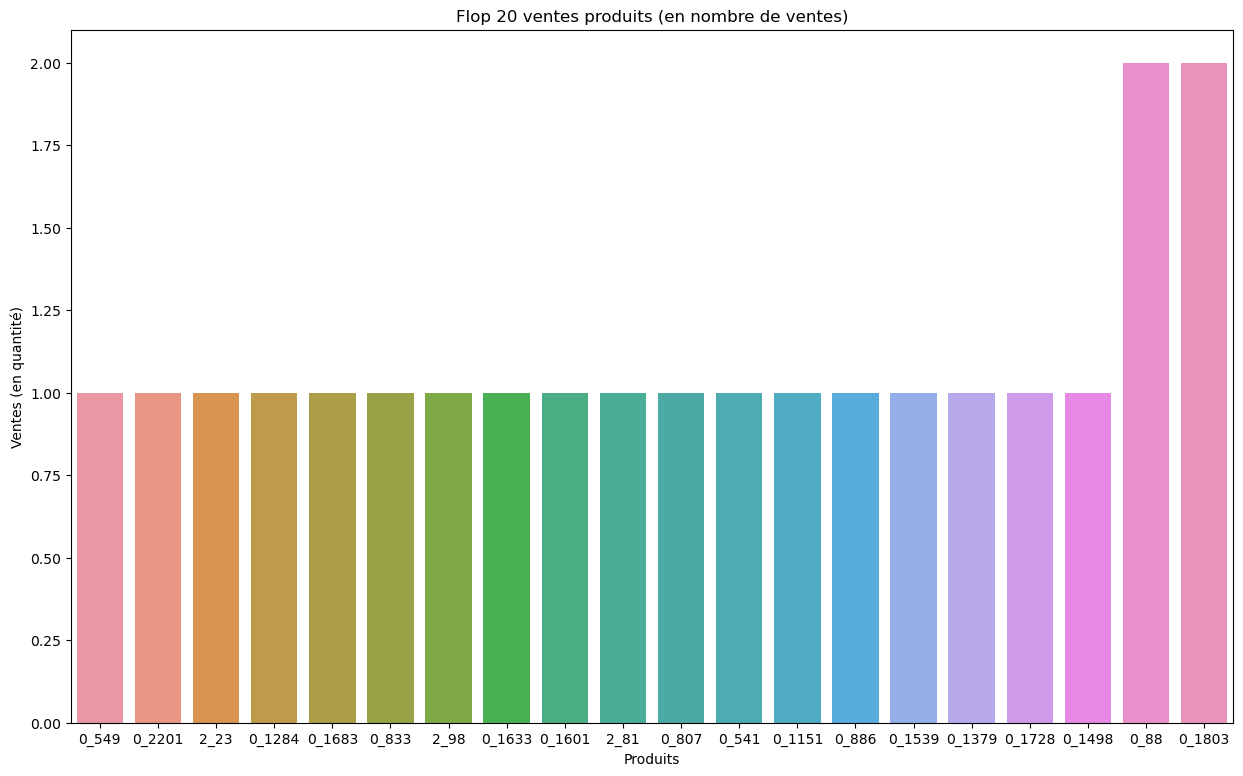

In [42]:
plt.figure(figsize=(15,9))

flop20_vente=produit.sort_values('count').head(20)
sns.barplot(x=flop20_vente['id_prod'], y=flop20_vente['count'])

plt.title('Flop 20 ventes produits (en nombre de ventes)')

plt.ylabel("Ventes (en quantité)")
plt.xlabel("Produits")

plt.show()

### Répartition du nombre de produits par catégorie

In [43]:
produit.groupby('categ')[['id_prod']].count()

,id_prod
categ,
0,2293
1,737
2,236


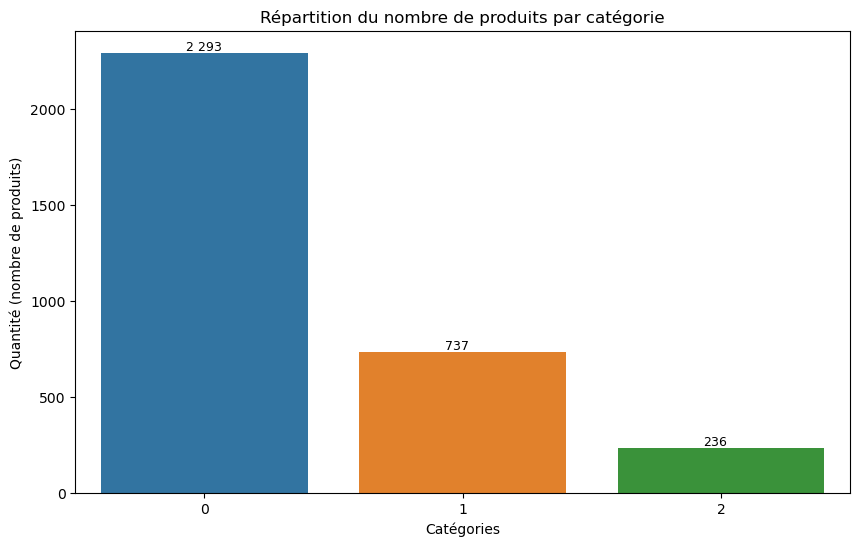

In [44]:
plt.figure(figsize=(10,6))

categ_nb=produit.groupby('categ')['id_prod'].count().reset_index()
sns.barplot(x=categ_nb['categ'], y=categ_nb['id_prod'])

plt.title("Répartition du nombre de produits par catégorie")

plt.ylabel("Quantité (nombre de produits)")
plt.xlabel("Catégories")

for i in range(len(categ_nb)):
    plt.text(i-0.07, categ_nb.iloc[i,1]+10, 
             '{:,}'.format(categ_nb.iloc[i,1]).replace(',',' '), fontsize=9)

plt.show()

### Répartition du chiffre d'affaires par catégorie

In [45]:
produit.groupby('categ')[['sum']].sum()

,sum
categ,
0,4422082.41
1,4653722.69
2,2780275.02


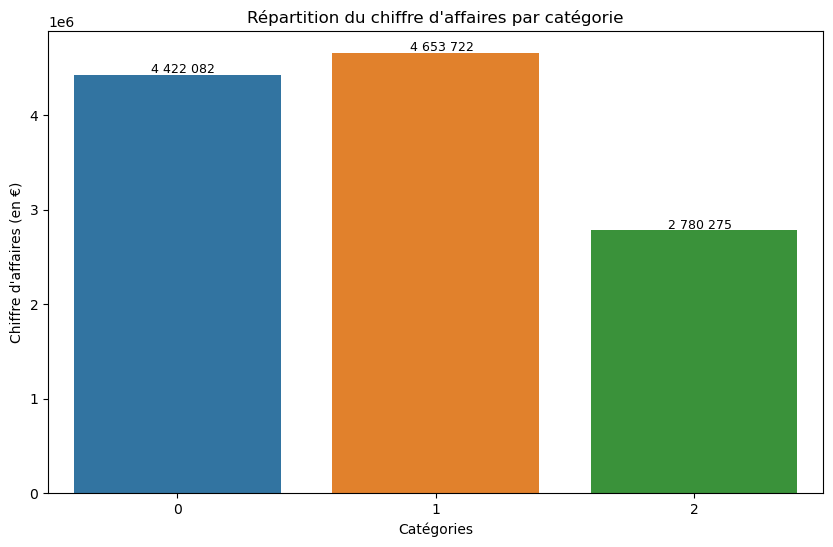

In [46]:
plt.figure(figsize=(10,6))

categ_vente=produit.groupby('categ')['sum'].sum().reset_index()
sns.barplot(x=categ_vente['categ'], y=categ_vente['sum'])

plt.title("Répartition du chiffre d'affaires par catégorie")

plt.ylabel("Chiffre d'affaires (en €)")
plt.xlabel("Catégories")

for i in range(len(categ_vente)):
    plt.text(i-0.1, categ_vente.iloc[i,1]+2e4, 
             '{:,}'.format(int(categ_vente.iloc[i,1])).replace(',',' '), fontsize=9)

plt.show()

### Courbe de Lorenz des produits

In [47]:
produit_desc=produit.sort_values('sum')[['id_prod', 'sum']].reset_index(drop=True)
produit_desc['cumsum']=produit_desc['sum'].cumsum()
produit_desc['cumsum/CA']=produit_desc['cumsum']/produit_desc['sum'].sum()

In [48]:
produit_desc

,id_prod,sum,cumsum,cumsum/CA
0,0_1539,0.99,0.99,8.350146e-08
1,0_1284,1.38,2.37,1.998974e-07
2,0_1653,1.98,4.35,3.669004e-07
3,0_541,1.99,6.34,5.347467e-07
4,0_807,1.99,8.33,7.025931e-07
...,...,...,...,...
3261,2_209,56971.86,11565707.13,9.755085e-01
3262,2_102,60736.78,11626443.91,9.806314e-01
3263,2_112,65407.76,11691851.67,9.861482e-01
3264,2_135,69334.95,11761186.62,9.919962e-01


In [49]:
y=np.array(produit_desc['cumsum/CA'])
# on ajoute un 0 pour commencer à 0 en x et y
y=np.append([0], y)
x=np.linspace(0, 1, len(y))

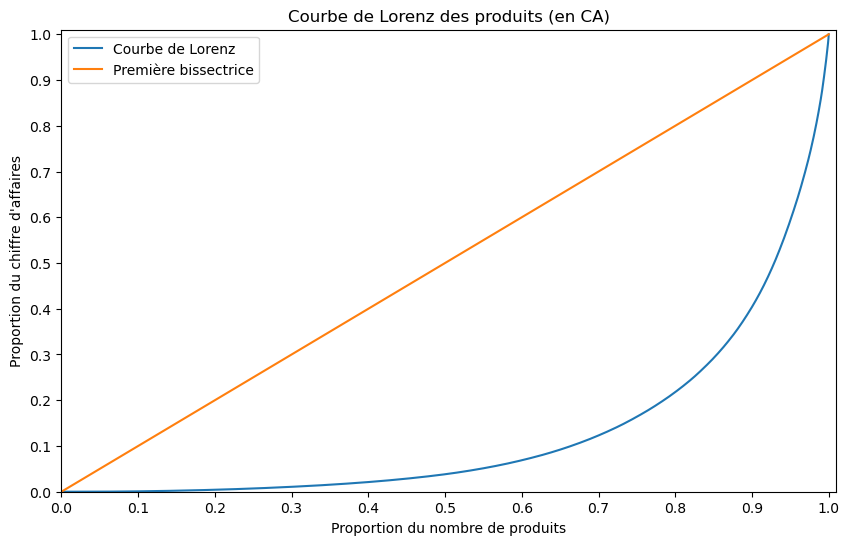

In [50]:
plt.figure(figsize=(10,6))

plt.plot(x, y, label='Courbe de Lorenz')
plt.plot(x, x, label='Première bissectrice')

plt.title('Courbe de Lorenz des produits (en CA)')
plt.xlabel('Proportion du nombre de produits')
plt.ylabel("Proportion du chiffre d'affaires")

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlim(0, 1.01)
plt.ylim(0, 1.01)

plt.legend()

Analyse : 

Cette courbe de Lorenz indique par exemple qu'environ 20% des produits représentent 80% du chiffre d'affaires où qu'environ 5% des produits représentent 35% du chiffre d'affaires.

Plus globalement, cette courbe de Lorenz montre que la distribution du chiffre d'affaires des produits est inégalitaire.

### Indice de Gini
Deux fois l'aire entre la première bissectrice et la courbe de Lorenz (compris en 0 et 1), plus il est élevé, plus la distribution est inégalitaire.

In [51]:
AUC = y.sum()/len(y) # Surface sous la courbe de Lorenz
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini=round(gini,3)
print(f"L'indice de Gini est de {gini}, ce qui confirme que la distribution du chiffre d'affaires des produits est très inégalitaire.")

L'indice de Gini est de 0.743, ce qui confirme que la distribution du chiffre d'affaires des produits est très inégalitaire.


<a id='clients' ></a>
## Analyse des Clients<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Nous allons maintenant créer un dataframe client en agrégeant les données pour chaque client.

### Création du dataframe Clients

In [52]:
df.head()

,id_prod,session_id,client_id,mois,price,categ,sex,birth,age
0,0_1518,s_211425,c_103,2022-05,4.18,0,f,1986,37
1,1_251,s_158752,c_8534,2022-02,15.99,1,m,1988,35
2,0_1277,s_225667,c_6714,2022-06,7.99,0,f,1968,55
3,2_209,s_52962,c_6941,2021-06,69.99,2,m,2000,23
4,0_1509,s_325227,c_4232,2023-01,4.99,0,m,1980,43


In [53]:
# on utilise get_dummies compter chaque catégorie 
df[['0', '1', '2']]=pd.get_dummies(df['categ'])
df[['m', 'f']]=pd.get_dummies(df['sex'])

In [54]:
# agrégation des données qu'on veut garder
customers_agg=df.groupby('client_id').agg(
    ventes_nb=('price', 'count'),
    ventes_ca=('price', 'sum'),
    categ_0=('0', 'sum'),
    categ_1=('1', 'sum'),
    categ_2=('2', 'sum')).reset_index()

customers_agg.head()

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2
0,c_1,39,558.18,30.0,8.0,1.0
1,c_10,58,1353.60,20.0,34.0,4.0
2,c_100,8,254.85,2.0,5.0,1.0
3,c_1000,125,2261.89,43.0,82.0,0.0
4,c_1001,102,1812.86,70.0,31.0,1.0


In [55]:
customers_2=pd.read_csv(folder+'customers_2.csv')

In [56]:
customers=pd.merge(customers_agg, customers_2, on='client_id', how='left')
customers.head()

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age
0,c_1,39,558.18,30.0,8.0,1.0,m,1955,68
1,c_10,58,1353.60,20.0,34.0,4.0,m,1956,67
2,c_100,8,254.85,2.0,5.0,1.0,m,1992,31
3,c_1000,125,2261.89,43.0,82.0,0.0,f,1966,57
4,c_1001,102,1812.86,70.0,31.0,1.0,m,1982,41


In [57]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8600 entries, 0 to 8599
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  8600 non-null   object 
 1   ventes_nb  8600 non-null   int64  
 2   ventes_ca  8600 non-null   float64
 3   categ_0    8600 non-null   float64
 4   categ_1    8600 non-null   float64
 5   categ_2    8600 non-null   float64
 6   sex        8600 non-null   object 
 7   birth      8600 non-null   int64  
 8   age        8600 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 671.9+ KB


In [58]:
# on remet le type category pour sex
customers['sex']=customers['sex'].astype('category')
customers['categ_0']=customers['categ_0'].astype('int64')
customers['categ_1']=customers['categ_1'].astype('int64')
customers['categ_2']=customers['categ_2'].astype('int64')

In [59]:
# on calcule de nombre de panier par client
client_session=df[['client_id', 'session_id']].drop_duplicates().groupby('client_id')[['session_id']].count().reset_index()
client_session.head()

,client_id,session_id
0,c_1,33
1,c_10,34
2,c_100,5
3,c_1000,93
4,c_1001,47


In [60]:
# on récupère les données de chaque client avec customers
customers=pd.merge(customers, client_session, on='client_id', how='left')
customers.head()

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,session_id
0,c_1,39,558.18,30,8,1,m,1955,68,33
1,c_10,58,1353.60,20,34,4,m,1956,67,34
2,c_100,8,254.85,2,5,1,m,1992,31,5
3,c_1000,125,2261.89,43,82,0,f,1966,57,93
4,c_1001,102,1812.86,70,31,1,m,1982,41,47


In [61]:
# on renomme le nombre de panier
customers.rename(columns={'session_id' : 'nb_panier'}, inplace=True)

In [62]:
customers.sort_values('nb_panier', ascending=False)

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier
677,c_1609,25488,324033.35,20167,5310,11,m,1980,43,10997
2724,c_3454,6773,113669.85,2700,4055,18,m,1969,54,5573
4388,c_4958,5195,289760.34,4,1888,3303,m,1999,24,3851
6337,c_6714,9187,153662.76,5316,3568,303,f,1968,55,2620
8344,c_8526,233,3975.06,87,146,0,f,1965,58,165
...,...,...,...,...,...,...,...,...,...,...
7128,c_7429,5,85.03,2,3,0,m,1992,31,1
3880,c_450,5,67.18,5,0,0,m,1953,70,1
3855,c_4478,1,13.36,1,0,0,f,1970,53,1
2563,c_3308,3,21.03,3,0,0,f,1991,32,1


In [63]:
# calcul du panier moyen par client en €
customers['panier_moyen']=(customers['ventes_ca']/customers['nb_panier']).apply(lambda x : '{:,.2f}'.format(x))

In [64]:
customers.head()

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91
1,c_10,58,1353.60,20,34,4,m,1956,67,34,39.81
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97
3,c_1000,125,2261.89,43,82,0,f,1966,57,93,24.32
4,c_1001,102,1812.86,70,31,1,m,1982,41,47,38.57


In [65]:
customers.describe(include='all')

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
count,8600,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600,8600.000000,8600.000000,8600.000000,8600
unique,8600,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,4467
top,c_1,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,30.25
freq,1,NaN,NaN,NaN,NaN,NaN,4479,NaN,NaN,NaN,9
mean,NaN,78.992093,1378.613967,48.334884,26.415000,4.242209,NaN,1978.260698,44.739302,39.804070,NaN
std,NaN,312.437204,5182.880999,232.764411,86.147564,36.561282,NaN,16.908755,16.908755,144.729848,NaN
min,NaN,1.000000,6.310000,0.000000,0.000000,0.000000,NaN,1929.000000,19.000000,1.000000,NaN
25%,NaN,27.000000,547.885000,9.000000,9.000000,0.000000,NaN,1966.000000,31.000000,15.000000,NaN
50%,NaN,51.000000,1027.210000,25.000000,19.000000,0.000000,NaN,1979.000000,44.000000,26.000000,NaN
75%,NaN,96.000000,1779.785000,56.000000,34.000000,3.000000,NaN,1992.000000,57.000000,50.000000,NaN


### Analyse

In [66]:
top20_client=customers.sort_values('ventes_ca', ascending=False).head(20).reset_index(drop=True)
top20_client

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
0,c_1609,25488,324033.35,20167,5310,11,m,1980,43,10997,29.47
1,c_4958,5195,289760.34,4,1888,3303,m,1999,24,3851,75.24
2,c_6714,9187,153662.76,5316,3568,303,f,1968,55,2620,58.65
3,c_3454,6773,113669.85,2700,4055,18,m,1969,54,5573,20.40
4,c_3263,403,5276.87,314,89,0,f,1985,38,143,36.90
5,c_1570,369,5271.62,260,108,1,f,1979,44,158,33.36
6,c_2899,105,5214.05,3,41,61,f,1994,29,69,75.57
7,c_2140,402,5208.82,310,91,1,f,1977,46,147,35.43
8,c_7319,371,5155.77,274,96,1,f,1974,49,145,35.56
9,c_8026,377,5093.22,300,77,0,m,1978,45,146,34.89


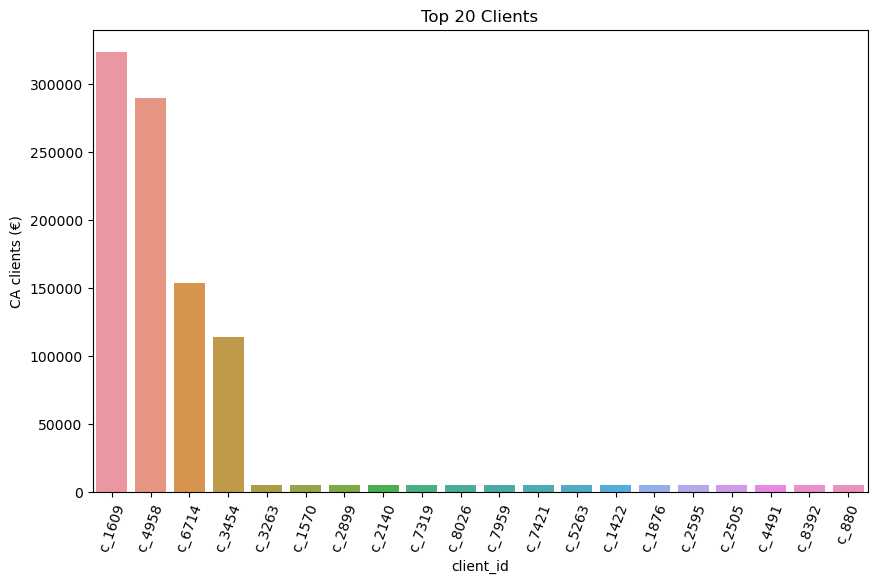

In [67]:
top20_client=customers.sort_values('ventes_ca', ascending=False).head(20).reset_index(drop=True)

plt.figure(figsize=(10,6))

plt.title('Top 20 Clients')

sns.barplot(data=top20_client, x='client_id', y='ventes_ca')

plt.ylabel('CA clients (€)')
plt.xticks(rotation=70);

On distingue immédiatement 4 outliers, 4 clients qui représente à eux seul une part importante du chiffre d'affaires.

''

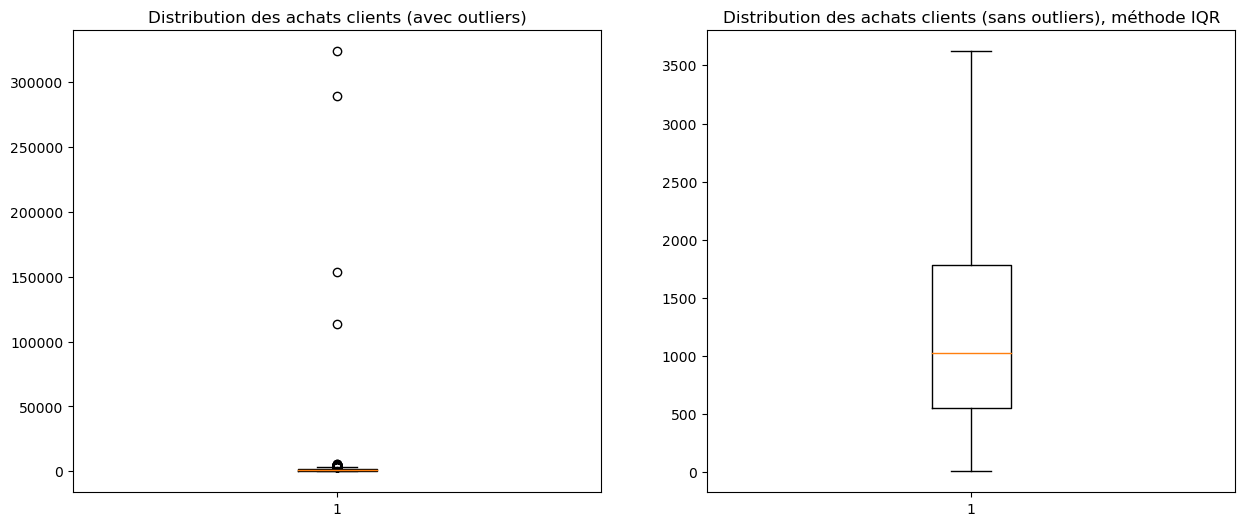

In [68]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Distribution des achats clients (avec outliers)')
plt.boxplot(x=customers['ventes_ca'])

plt.subplot(1,2,2)
plt.title('Distribution des achats clients (sans outliers), méthode IQR')
plt.boxplot(x=customers['ventes_ca'], showfliers=False)
;

Ces représentations montre bien qu'on a 4 valeurs extrêmes qui ne correspondent pas aux restes des achats clients.
Nous allons maintenant tracer la courbe de Lorenz et calculer l'indice de Gini pour mesurer l'inégalité globale de la distribution des achats clients.

### Courbe de Lorenz des clients

In [69]:
customers

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91
1,c_10,58,1353.60,20,34,4,m,1956,67,34,39.81
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97
3,c_1000,125,2261.89,43,82,0,f,1966,57,93,24.32
4,c_1001,102,1812.86,70,31,1,m,1982,41,47,38.57
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,14,189.41,11,3,0,m,1955,68,9,21.05
8596,c_996,95,1625.58,40,55,0,f,1970,53,79,20.58
8597,c_997,59,1490.01,23,21,15,f,1994,29,24,62.08
8598,c_998,53,2779.88,14,11,28,m,2001,22,23,120.86


In [70]:
client_desc=customers.sort_values('ventes_ca')[['client_id', 'ventes_ca']].reset_index(drop=True)
client_desc['cumsum']=client_desc['ventes_ca'].cumsum()
client_desc['cumsum/CA']=client_desc['cumsum']/client_desc['ventes_ca'].sum()

In [71]:
client_desc.head()

,client_id,ventes_ca,cumsum,cumsum/CA
0,c_8351,6.31,6.31,5.322164e-07
1,c_8140,8.30,14.61,1.232279e-06
2,c_8114,9.98,24.59,2.074041e-06
3,c_240,11.06,35.65,3.006896e-06
4,c_4648,11.20,46.85,3.951559e-06


In [72]:
y=np.array(client_desc['cumsum/CA'])
# on ajoute un 0 pour commencer à 0 en x et y
y=np.append([0], y)
x=np.linspace(0, 1, len(y))

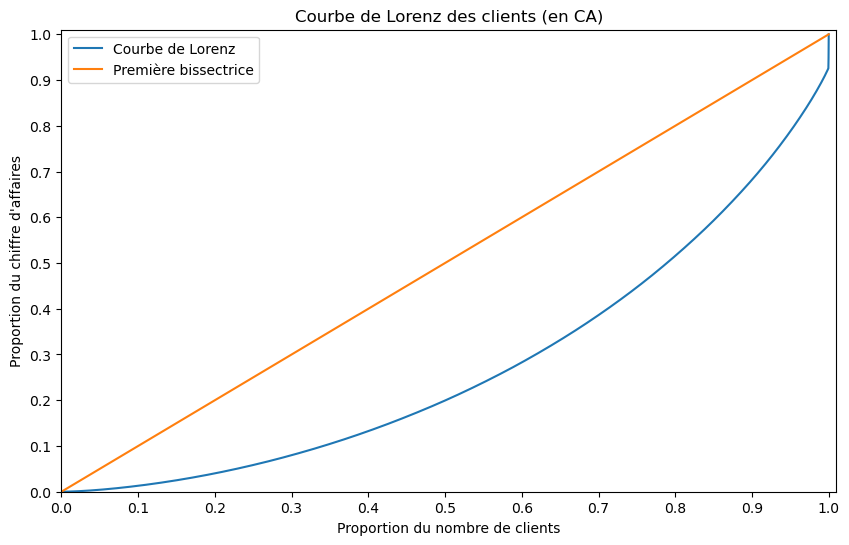

In [73]:
plt.figure(figsize=(10,6))

plt.plot(x, y, label='Courbe de Lorenz')
plt.plot(x, x, label='Première bissectrice')

plt.title('Courbe de Lorenz des clients (en CA)')
plt.xlabel('Proportion du nombre de clients')
plt.ylabel("Proportion du chiffre d'affaires")

plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlim(0, 1.01)
plt.ylim(0, 1.01)

plt.legend()

In [74]:
# Part du CA des 4 outliers
100*client_desc.iloc[-4:, 1].sum()/client_desc['ventes_ca'].sum()

7.431851767884309

Le graphique indique par exemple qu'environ 20% des clients représentent 50% des ventes.

La courbe confirme ce qu'on avait vu avec la boîte à moustache et le diagramme en barre, une part infime des clients (4/8600 soit 0.05% du nombre de clients représentent 7.43% des ventes totales.

### Indice de Gini
Deux fois l'aire entre la première bissectrice et la courbe de Lorenz (compris en 0 et 1), plus il est élevé, plus la distribution est inégalitaire.

In [75]:
AUC = y.sum()/len(y) # Surface sous la courbe de Lorenz
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini=round(gini,3)
print(f"L'indice de Gini est de {gini}, ce qui confirme que la distribution des ventes clients est plutôt inégalitaire.")

L'indice de Gini est de 0.446, ce qui confirme que la distribution des ventes clients est plutôt inégalitaire.


## Analyses Univariées<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [76]:
# fonctions issues du projet précédent
from fonctions import *

In [77]:
produit.head()

,id_prod,sum,count,price,categ
0,0_0,4657.50,1242,3.75,0
1,0_1,5352.13,487,10.99,0
2,0_10,394.90,22,17.95,0
3,0_100,61.80,3,20.60,0
4,0_1000,2954.88,432,6.84,0


In [78]:
produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id_prod  3266 non-null   object  
 1   sum      3266 non-null   float64 
 2   count    3266 non-null   int64   
 3   price    3266 non-null   float64 
 4   categ    3266 non-null   category
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 105.5+ KB


### Analyses Univariées produits

#### Variable price

In [79]:
stat_var(produit['price'])

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore,echantillon_base_log,log_IQR,log_zscore,echantillon_base_sqrt,sqrt_IQR,sqrt_zscore
moyenne,21.7572,14.0925,17.7512,2.5705,2.5252,2.5705,4.0894,3.6513,3.8732
moyenne_min,19.5815,12.6833,15.976,2.3135,2.2727,2.3135,3.6804,3.2862,3.4859
moyenne_max,23.933,15.5018,19.5263,2.8276,2.7778,2.8276,4.4983,4.0164,4.2606
test_moyenne_10_pourcents,False,False,False,True,True,True,False,True,True
mediane,13.035,11.99,12.99,2.5676,2.5642,2.5676,3.6104,3.5071,3.6042
mode,4.99,4.99,4.99,1.6074,1.6074,1.6074,2.2338,2.2338,2.2338
moyenne_tronquee,16.8682,13.3936,15.3499,2.5578,2.5256,2.5575,3.8446,3.5909,3.7285
ecart_type,29.5839,9.6554,17.4515,0.9777,0.9233,0.97,2.2441,1.4245,1.7903
CV,1.3597,0.6851,0.9831,0.3804,0.3656,0.3773,0.5488,0.3901,0.4622
IQR,16.0,12.58,14.65,1.1906,1.1461,1.1906,2.1509,1.8507,2.0455


In [80]:
# fonction qui donne les indicateurs de l'analyse univariée
stat_prix_produit=stat_var(produit['price'])
stat_prix_produit.iloc[:, :3]

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore
moyenne,21.7572,14.0925,17.7512
moyenne_min,19.5815,12.6833,15.976
moyenne_max,23.933,15.5018,19.5263
test_moyenne_10_pourcents,False,False,False
mediane,13.035,11.99,12.99
mode,4.99,4.99,4.99
moyenne_tronquee,16.8682,13.3936,15.3499
ecart_type,29.5839,9.6554,17.4515
CV,1.3597,0.6851,0.9831
IQR,16.0,12.58,14.65


<AxesSubplot:xlabel='price', ylabel='Count'>

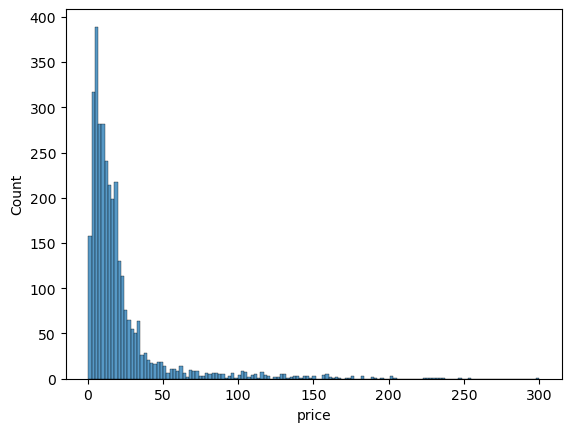

In [81]:
sns.histplot(produit['price'])

#### Variable sum

In [82]:
stat_ca_produit=stat_var(produit['sum'])
stat_ca_produit.iloc[:, :3]

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore
moyenne,3630.1531,1436.2133,2768.4947
moyenne_min,3267.1378,1292.592,2491.6452
moyenne_max,3993.1684,1579.8346,3045.3441
test_moyenne_10_pourcents,False,False,False
mediane,797.22,579.485,741.895
mode,17.91,17.91,17.91
moyenne_tronquee,2394.5233,1217.7273,2041.4904
ecart_type,7370.8303,1823.2513,4582.015
CV,2.0304,1.2695,1.6551
IQR,3172.3675,1843.64,2885.9625


<AxesSubplot:xlabel='sum', ylabel='Count'>

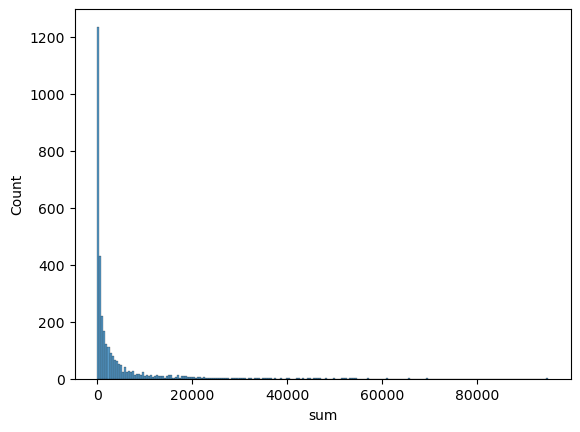

In [83]:
sns.histplot(produit['sum'])

### Analyses Univariées clients

In [84]:
customers.head()

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91
1,c_10,58,1353.60,20,34,4,m,1956,67,34,39.81
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97
3,c_1000,125,2261.89,43,82,0,f,1966,57,93,24.32
4,c_1001,102,1812.86,70,31,1,m,1982,41,47,38.57


In [85]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8600 entries, 0 to 8599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   client_id     8600 non-null   object  
 1   ventes_nb     8600 non-null   int64   
 2   ventes_ca     8600 non-null   float64 
 3   categ_0       8600 non-null   int64   
 4   categ_1       8600 non-null   int64   
 5   categ_2       8600 non-null   int64   
 6   sex           8600 non-null   category
 7   birth         8600 non-null   int64   
 8   age           8600 non-null   int64   
 9   nb_panier     8600 non-null   int64   
 10  panier_moyen  8600 non-null   object  
dtypes: category(1), float64(1), int64(7), object(2)
memory usage: 747.6+ KB


#### Analyse univariée variable ventes_ca

In [86]:
warnings.simplefilter("ignore")

stat_vente_client=stat_var(customers['ventes_ca'])
stat_vente_client.iloc[:, :3]

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore
moyenne,1378.614,1193.6169,1276.7513
moyenne_min,1240.7526,1074.2552,1149.0761
moyenne_max,1516.4754,1312.9786,1404.4264
test_moyenne_10_pourcents,False,False,False
mediane,1027.21,994.9,1026.93
mode,1223.7,1223.7,1223.7
moyenne_tronquee,1200.4792,1141.2903,1199.5607
ecart_type,5182.881,828.9147,954.4276
CV,3.7595,0.6945,0.7475
IQR,1231.9,1152.245,1231.445


<AxesSubplot:xlabel='ventes_ca', ylabel='Count'>

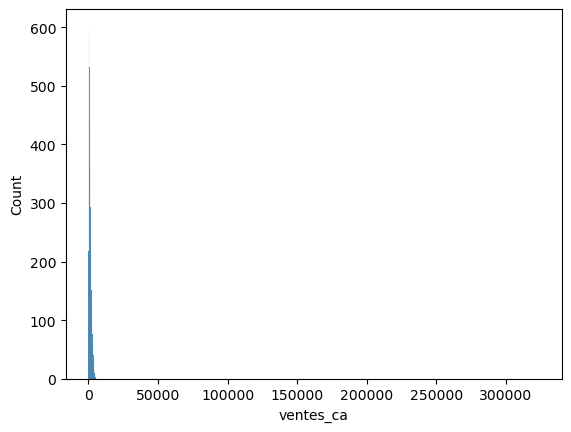

In [87]:
sns.histplot(customers['ventes_ca'])

#### Analyse univariée variable âge

In [88]:
stat_age_client=stat_var(customers['age'])
stat_age_client.iloc[:, :3]

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore
moyenne,44.7393,44.7393,44.7393
moyenne_min,40.2654,40.2654,40.2654
moyenne_max,49.2132,49.2132,49.2132
test_moyenne_10_pourcents,True,True,True
mediane,44.0,44.0,44.0
mode,19,19,19
moyenne_tronquee,44.1647,44.1647,44.1647
ecart_type,16.9088,16.9088,16.9088
CV,0.3779,0.3779,0.3779
IQR,26.0,26.0,26.0


<AxesSubplot:xlabel='age', ylabel='Count'>

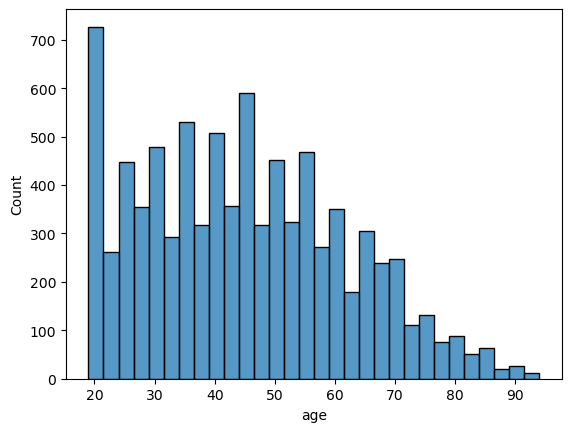

In [89]:
sns.histplot(customers['age'])

<a id='partie_2' ></a>
## Partie 2 : Analyses bivariées<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Nous allons étudié les corrélations en plusieurs variables quantitatives ou qualitatives à l'aide des tests du Chi2, de Regression Linéaire et de l'anova.

<a id='genre_categ' ></a>
### 1. Lien entre le genre du client et les catégories de livres achetés<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Ici nous avons 2 variables qualitatives, nous allons donc effectuer un test du chi2.

Le test du chi2 va permettre de déterminer si ces 2 variables catégorielles sont indépendantes en comparant un chi2 théorique (fréquences attendues) avec un chi2 calculé (fréquences observées) .

Afin de réaliser notre test, nous allons d'abord créer le tableau de contingence.

On fixera le risque d'erreur alpha à 5%.

Voici les prérequis du chi2 :
- L'indépendance des observations pour les 2 variables doivent être indépendantes.
- L'effectif doit être suffisant (plus de 5 observations par catégorie recommandées).
- La taille de l'échantillon doit être supérieur à 30.

#### Tableau de contingence 
Tableau qui compte le nombre d'occurences entre 2 variables qualitatives, on l'occurence entre la catégorie de livre et le genre.

In [90]:
crosstab=pd.crosstab(index=df['categ'], columns=df['sex'], margins=True, margins_name='Total')
crosstab

sex,f,m,Total
categ,,,
0,206220,209460,415680
1,114899,112270,227169
2,17283,19200,36483
Total,338402,340930,679332


#### Calcul des 'expected count'
Le nombre d'achat pour chaque catégorie qu'on s'attend à avoir pour les hommes et les femmes

In [91]:
proportion_femme=crosstab.iloc[-1,0]/crosstab.iloc[-1,-1]
proportion_homme=1-proportion_femme
print(round(100*proportion_femme,2), "% des achats on été réalisés par des femmes")
print(round(100*proportion_homme,2), "% des achats on été réalisés par des hommes")

49.81 % des achats on été réalisés par des femmes
50.19 % des achats on été réalisés par des hommes


Si les variables genre et catégories sont indépendantes, on s'attend à que ces proportions soit les mêmes dans chaque catégorie.

In [92]:
# on fait une copie de notre tableau de contingence pour calculer les expected count
crosstab_expected=crosstab.copy()

In [93]:
crosstab_expected['f']=(crosstab_expected['Total']*proportion_femme).astype('int64')
crosstab_expected['m']=(crosstab_expected['Total']*proportion_homme).astype('int64')
crosstab_expected

sex,f,m,Total
categ,,,
0,207066,208613,415680
1,113161,114007,227169
2,18173,18309,36483
Total,338402,340930,679332


Les expected count sont tous supérieurs à 5 donc le tableau de contingence est mathématiquement valide.

#### Test du chi2

Nous allons maintenant réaliser notre test d'indépendance du chi2.

Voici le test statistique :

- H0 : Les variables genre et catégorie sont indépendantes

- H1 : Les variables genre et catégories sont liées
 
On rejetera H0 si la pvalue < alpha avec alpha = 5%
 
alpha représente le risque (de première espèce) de rejeter H0 alors qu'il fallait l'accepter.

La pvalue est l'indicateur qui va permettre de valider ou de rejeter H0, plus la pvalue est faible, plus la preuve contre l'hypothèse nulle est forte.
La pvalue représente la probabilité empirique de commettre une erreur en rejetant H0.

Voici la formule mathématique du chi2 :

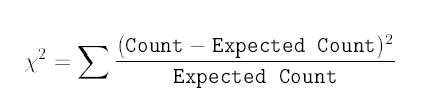

In [94]:
from scipy.stats import chi2_contingency

In [95]:
# Le test du chi2
statistic_test_chi_square, pvalue, degre_liberte, expected_count= chi2_contingency(crosstab.iloc[:3, :2])
chi2_contingency(crosstab.iloc[:3, :2])

(147.00253568681114,
 1.1989607410166063e-32,
 2,
 array([[207066.56444861, 208613.43555139],
        [113161.81769444, 114007.18230556],
        [ 18173.61785695,  18309.38214305]]))

In [96]:
print('Le test statistique chi square :', statistic_test_chi_square)
print('La pvalue :', pvalue)
print('Les degrés de liberté :', degre_liberte)
print('Le tableau de contingence avec les expected count :', expected_count)

Le test statistique chi square : 147.00253568681114
La pvalue : 1.1989607410166063e-32
Les degrés de liberté : 2
Le tableau de contingence avec les expected count : [[207066.56444861 208613.43555139]
 [113161.81769444 114007.18230556]
 [ 18173.61785695  18309.38214305]]


On retrouve notre tableau de contingence des expected count qu'on avait construit plus haut manuellement.

La valeur de la pvalue est de 1.1989607410166063e-32 << 0.05

On rejette H0, donc les variables genre et catégorie sont liées d'après le test du chi2.

Cela signifie qu'on considère que les variables genre et catégorie ne sont pas indépendantes et qu'il y a une corrélation entre les 2.

#### Statistique du « Cramer’s V »

On calcul le Cramer V pour évaluer la force de la relation entre les 2 variables.

In [97]:
V=np.sqrt(statistic_test_chi_square/((len(df))*(degre_liberte-1)))
V

0.014710294817475282

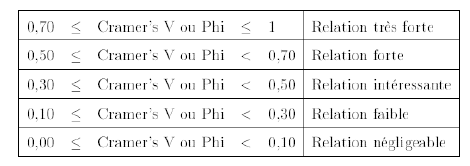

D'après ce tableau, cela indique que la relation entre les 2 variables est négligeable.

Il semble donc que la relation de dépendance des 2 variables est plus faible que ne le laissait croire la statistique du chi2 et la pvalue qui lui était associée.

#### Calcul des résidus standardisés

Voici la formule des résidus standardisés :
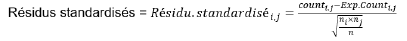

In [437]:
# calcul des ni, les sous totaux des colonnes
ni=crosstab.iloc[-1,:-1].values

# calcul des nj, les sous totaux des lignes 
nj=crosstab.iloc[:-1,-1].values

# on redimensionne les matrices pour le produit matriciel
ni = np.reshape(ni, (1,(crosstab.shape[1]-1)))
nj = np.reshape(nj, ((crosstab.shape[0]-1),1))

# calcul des count, les fréquences réelles
count=crosstab.iloc[:-1, :-1]

# calcul des expected_count, les fréquences théoriques
expected_count=crosstab_expected.iloc[:-1, :-1]

# Tableau des résidus
numerateur = (count-expected_count)
denominateur = np.sqrt(ni*nj/crosstab.iloc[-1,-1])
tableau_residus=numerateur/denominateur
tableau_residus

sex,f,m
categ,,
0,-1.859154,1.854438
1,5.166540,-5.144388
2,-6.601906,6.584774


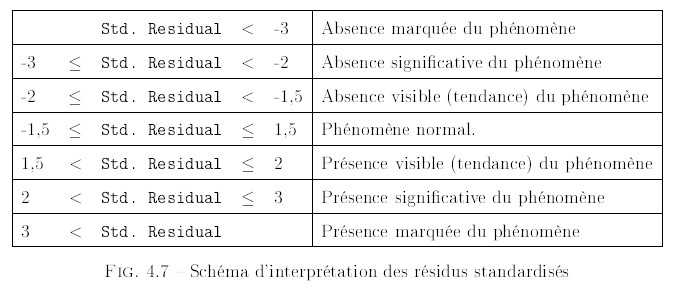

D'après le tableau des résidus standardisés, la dépendance entre le genre et la catégorie de livre serait marquée pour les hommes et la catégorie 2 de livre, les femmes et la catégorie 1 et que le phénomène est normal pour la catégorie 0 en étant un tout petit peu marqué pour les hommes.

<a id='age_montant' ></a>
### 2. Lien entre l’âge des clients et le montant total des achats<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Nous allons étudier les corrélations entre 2 variables quantitatives : l'âge des clients et le montant total des achats de ces clients. 

Pour cela, nous allons calculer le coefficient de pearson et faire un test de régression linéaire.

Les prérequis pour une régression linéaire sont :

- La Linéarité : il doit exister une relation linéaire entre les deux variables
- L'Homoscédasticité : les résidus (différence entre les valeurs prédites et les valeurs réelles) doivent être répartis également sur l'ensemble de l'échelle de la variable dépendante (ici le montant total des achats).
- L'Indépendance des observations les unes des autres
- Les résidus doivent être distribués normalement

#### Analyse univariée de la variable âge

In [99]:
# fonction issue du projet précédent
stat_age_client=stat_var(customers['age'])
stat_age_client

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore,echantillon_base_log,log_IQR,log_zscore,echantillon_base_sqrt,sqrt_IQR,sqrt_zscore
moyenne,44.7393,44.7393,44.7393,3.7244,3.7244,3.7244,6.5656,6.5656,6.5656
moyenne_min,40.2654,40.2654,40.2654,3.3519,3.3519,3.3519,5.9091,5.9091,5.9091
moyenne_max,49.2132,49.2132,49.2132,4.0968,4.0968,4.0968,7.2222,7.2222,7.2222
test_moyenne_10_pourcents,True,True,True,True,True,True,True,True,True
mediane,44.0,44.0,44.0,3.7842,3.7842,3.7842,6.6332,6.6332,6.6332
mode,19,19,19,2.9444,2.9444,2.9444,4.3589,4.3589,4.3589
moyenne_tronquee,44.1647,44.1647,44.1647,3.7307,3.7307,3.7307,6.5537,6.5537,6.5537
ecart_type,16.9088,16.9088,16.9088,0.4012,0.4012,0.4012,1.2775,1.2775,1.2775
CV,0.3779,0.3779,0.3779,0.1077,0.1077,0.1077,0.1946,0.1946,0.1946
IQR,26.0,26.0,26.0,0.6091,0.6091,0.6091,1.9821,1.9821,1.9821


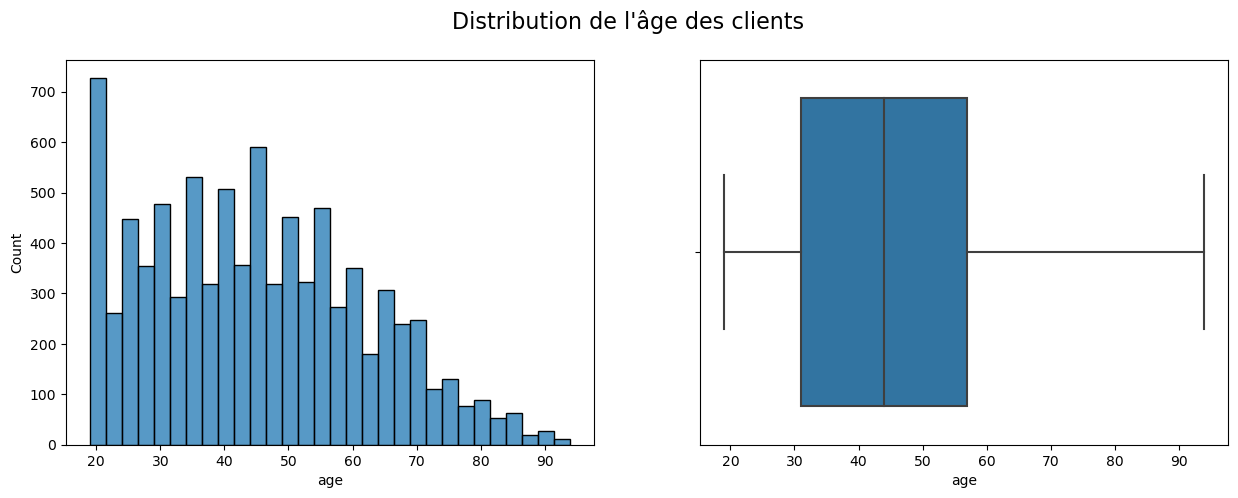

In [362]:
plt.figure(figsize=(15,5))

plt.suptitle("Distribution de l'âge des clients", size=16)

plt.subplot(1,2,1)
sns.histplot(customers['age'])

plt.subplot(1,2,2)
sns.boxplot(customers['age']);

#### Analyse univariée de la variable vente_ca (montant total des achats)

In [106]:
stat_vente_client=stat_var(customers['ventes_ca'])
stat_vente_client

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore,echantillon_base_log,log_IQR,log_zscore,echantillon_base_sqrt,sqrt_IQR,sqrt_zscore
moyenne,1378.614,1193.6169,1276.7513,6.8337,6.8312,6.8574,33.4431,33.1916,33.245
moyenne_min,1240.7526,1074.2552,1149.0761,6.1503,6.1481,6.1717,30.0988,29.8724,29.9205
moyenne_max,1516.4754,1312.9786,1404.4264,7.5171,7.5143,7.5431,36.7874,36.5107,36.5695
test_moyenne_10_pourcents,False,False,False,True,True,True,True,True,True
mediane,1027.21,994.9,1026.93,6.9346,6.9343,6.9422,32.0501,32.0333,32.0457
mode,1223.7,1223.7,1223.7,5.5595,5.5595,5.5595,34.9814,34.9814,34.9814
moyenne_tronquee,1200.4792,1141.2903,1199.5607,6.8754,6.8748,6.8885,32.9347,32.886,32.9229
ecart_type,5182.881,828.9147,954.4276,0.8954,0.888,0.8391,16.1308,13.0282,13.0974
CV,3.7595,0.6945,0.7475,0.131,0.13,0.1224,0.4823,0.3925,0.394
IQR,1231.9,1152.245,1231.445,1.1782,1.1782,1.1675,18.7806,18.7621,18.7776


L'échantillon de base est de mauvaise qualité du point de vue de la distribution. 4 outliers modifient énormément sa distribution. Cela se manifeste par une grande différence entre la moyenne et la médiane, un écart type, un coefficient de variation, un skewness et kurtosis anormalement élevé.

Le fait de retirer ces 4 outliers améliore déja grandemment l'échantillon comme on le voit sur la colonne du zscore (3e colonne).

In [109]:
# Nombre d'outliers avec chaque méthode
from fonctions import *
outliers(customers['ventes_ca'])

Nombre de valeurs aberrantes ou atypiques pour chaque échantillon transformé :
Echantillon de base méthode IQR : 246
Echantillon de base méthode zscore : 4
Echantillon passé au logarithme méthode IQR : 4
Echantillon passé au logarithme méthode zscore : 71
Echantillon passé à la racine méthode IQR : 16
Echantillon passé à la racine méthode zscore : 4


In [110]:
# Redefinition de l'échantilon en enlevant les outliers avec la méthode de l'IQR et du zscore
var = customers['ventes_ca']
var_zscore = var[abs(st.zscore(var))<3]
var_IQR = var[var<(np.quantile(var, 0.75)+(1.5*(st.iqr(var))))]

In [407]:
st.shapiro(var_zscore)

ShapiroResult(statistic=0.903672456741333, pvalue=0.0)

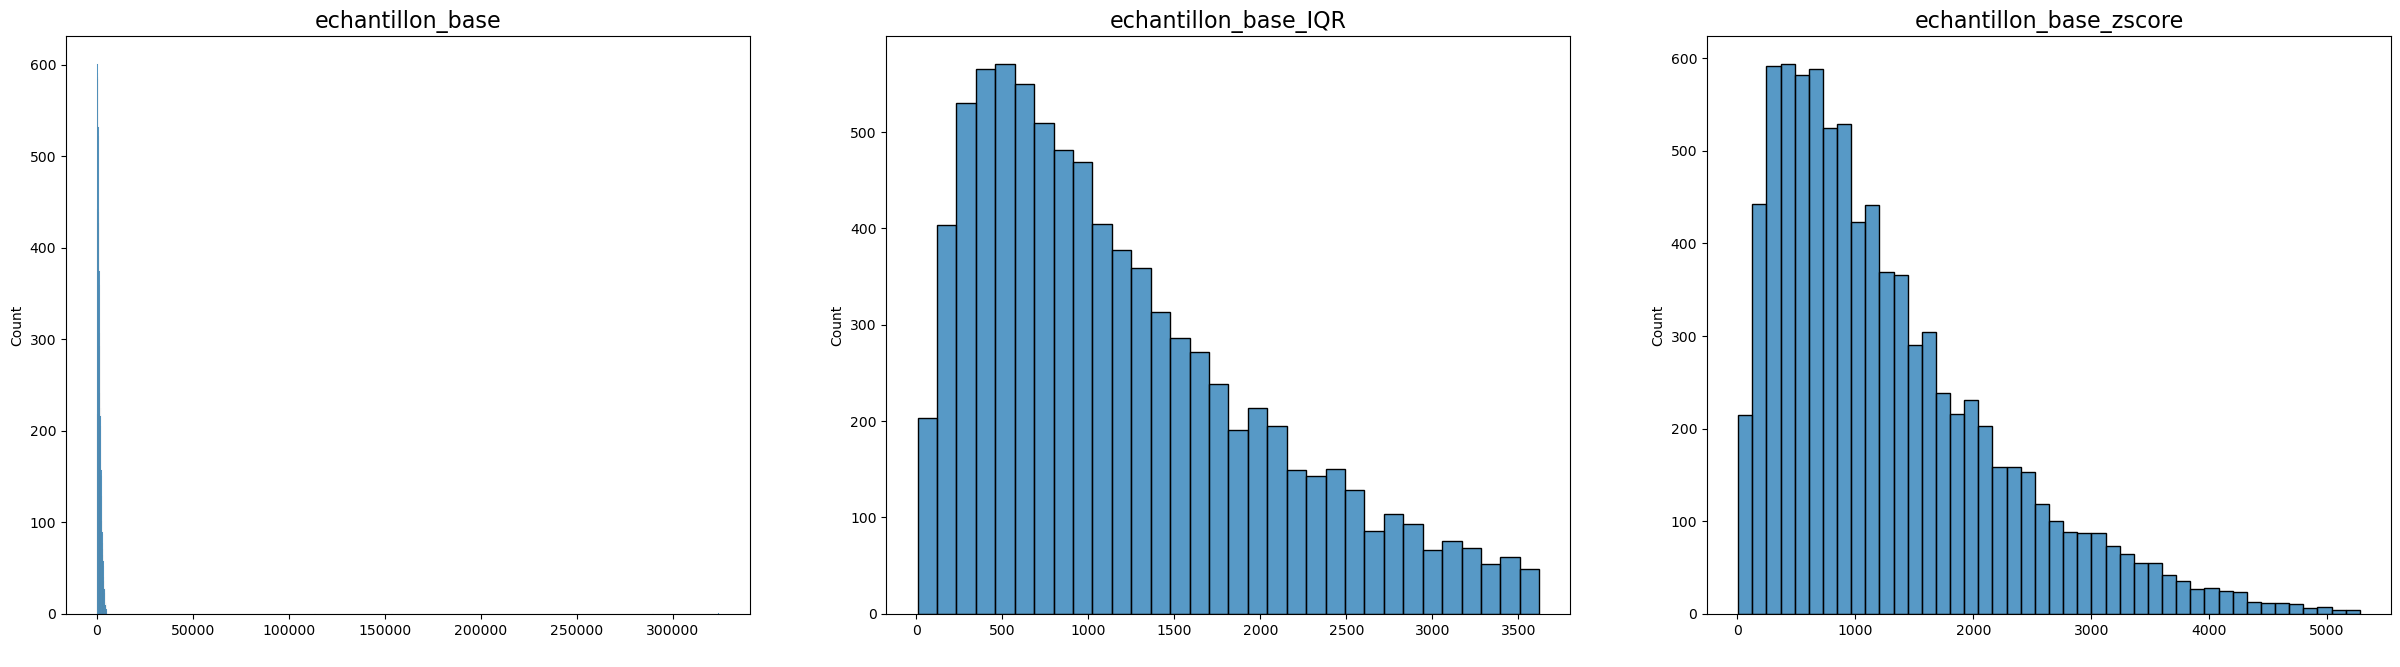

In [363]:
# fonction qui génère les histogrammes de chaque échantillon
hist_var(customers['ventes_ca'], 3)

On peut voir avec cette analyse que les 4 outliers principaux ont un impact significatif sur l'échantillon.

Cela se manifeste notamment par une différence au niveau de la distribution (histogramme echantillon_base et echantillon_base_zscore).

Cela se confirme avec des différences aux niveau d'indicateurs tels que la moyenne, la coefficient de variation, le kurtosis et le skewness comme dit précédemment.

Pour les tests de regression, nous garderons l'échantillon zscore (sans les 4 outliers principaux).

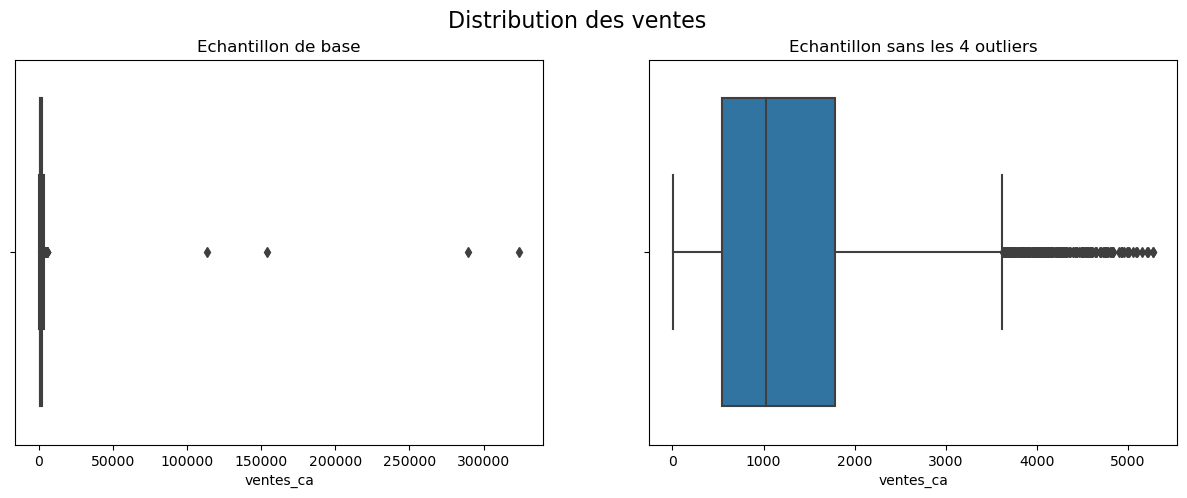

In [367]:
plt.figure(figsize=(15,5))

plt.suptitle("Distribution des ventes", size=16)

plt.subplot(1,2,1)
sns.boxplot(customers['ventes_ca'])
plt.title('Echantillon de base')

plt.subplot(1,2,2)
sns.boxplot(var_zscore)
plt.title('Echantillon sans les 4 outliers');

#### Régression Linéaire

In [114]:
# Df des clients sans les 4 outliers zscore
customers_vente_ca_zscore=customers.sort_values('ventes_ca', ascending=False).iloc[4:, :]
customers_vente_ca_zscore

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
2513,c_3263,403,5276.87,314,89,0,f,1985,38,143,36.90
634,c_1570,369,5271.62,260,108,1,f,1979,44,158,33.36
2108,c_2899,105,5214.05,3,41,61,f,1994,29,69,75.57
1268,c_2140,402,5208.82,310,91,1,f,1977,46,147,35.43
7006,c_7319,371,5155.77,274,96,1,f,1974,49,145,35.56
...,...,...,...,...,...,...,...,...,...,...,...
4044,c_4648,1,11.20,0,1,0,m,2004,19,1,11.20
1556,c_240,1,11.06,0,1,0,m,1998,25,1,11.06
7889,c_8114,2,9.98,2,0,0,m,1962,61,2,4.99
7918,c_8140,2,8.30,2,0,0,m,1971,52,2,4.15


##### Nuage de points

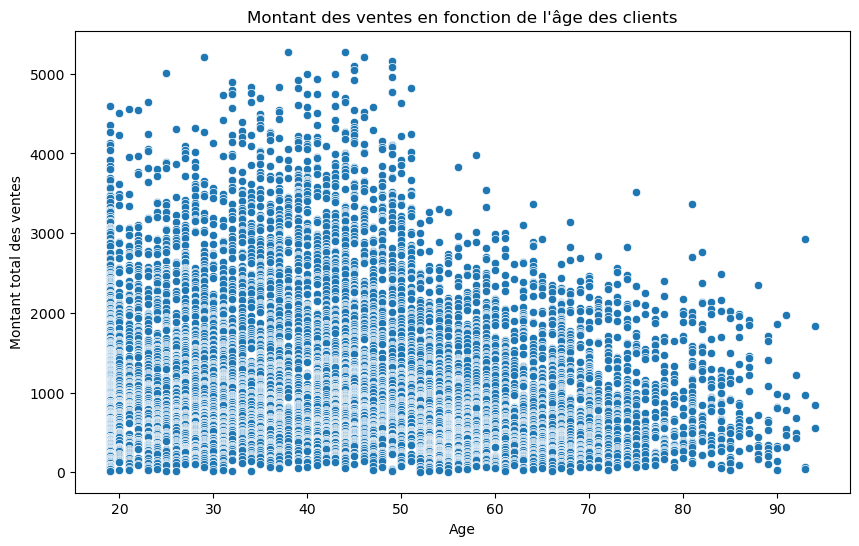

In [115]:
X=customers_vente_ca_zscore['age']
Y=customers_vente_ca_zscore['ventes_ca']

# Création du nuage de point
plt.figure(figsize=(10,6))

plt.ylabel('Montant total des ventes')
plt.xlabel('Age')
plt.title("Montant des ventes en fonction de l'âge des clients")

sns.scatterplot(X, Y);

Il semblerait qu'il y est une légère corrélation négative entre le montant total des achats et l'âge des clients.
Nous allons vérifier cela par le calcul.

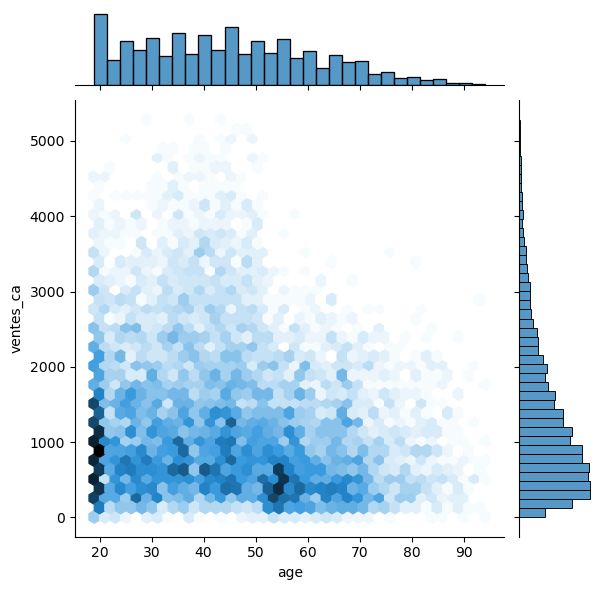

In [371]:
sns.jointplot(data=customers_vente_ca_zscore, x='age', y='ventes_ca', kind='hex');

##### Coefficient de pearson

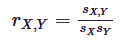 avec 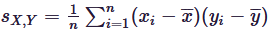

Un coefficient de pearson proche de 0 indique une absence de corrélation entre les 2 variables.

Un coefficient de pearson proche de 1 indique une corrélation positive entre les 2 variables.

Un coefficient de pearson proche de -1 indique une corrélation négative entre les 2 variables.

Nous formulons de nouveau un test d'hypothèse avec :

- H0 : Les variables âge et montant total des achats sont indépendantes
- H1 : Les variables âge et montant total des achats sont liées

On prend un risque d'erreur alpha=5%

In [116]:
r_pearson, pvalue = st.pearsonr(X, Y)
st.pearsonr(X, Y)

PearsonRResult(statistic=-0.18832651564713132, pvalue=1.8592326764596198e-69)

pvalue=1.8592326764596198e-69 << 0.05 donc on rejette H0 ==> Les variables âge et montant total des achats sont liées.

r_pearson = -0.18832651564713132 donc il y a une interrelation linéaire faible négative.

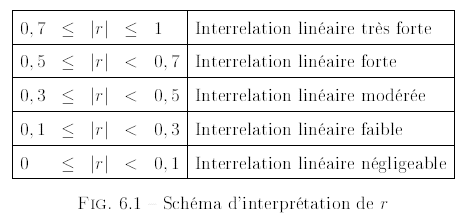

In [375]:
# matrice de corrélation, on retrouve aussi notre coefficient de pearson
customers_vente_ca_zscore.corr()

,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,birth,age,nb_panier
ventes_nb,1.000000,0.835648,0.963786,0.773550,-0.166964,-0.030434,0.030434,0.923065
ventes_ca,0.835648,1.000000,0.709931,0.712370,0.363470,0.188327,-0.188327,0.823218
categ_0,0.963786,0.709931,1.000000,0.601209,-0.284325,-0.002650,0.002650,0.819299
categ_1,0.773550,0.712370,0.601209,1.000000,-0.165768,-0.288569,0.288569,0.893015
categ_2,-0.166964,0.363470,-0.284325,-0.165768,1.000000,0.515592,-0.515592,-0.127731
birth,-0.030434,0.188327,-0.002650,-0.288569,0.515592,1.000000,-1.000000,-0.164608
age,0.030434,-0.188327,0.002650,0.288569,-0.515592,-1.000000,1.000000,0.164608
nb_panier,0.923065,0.823218,0.819299,0.893015,-0.127731,-0.164608,0.164608,1.000000


<AxesSubplot:>

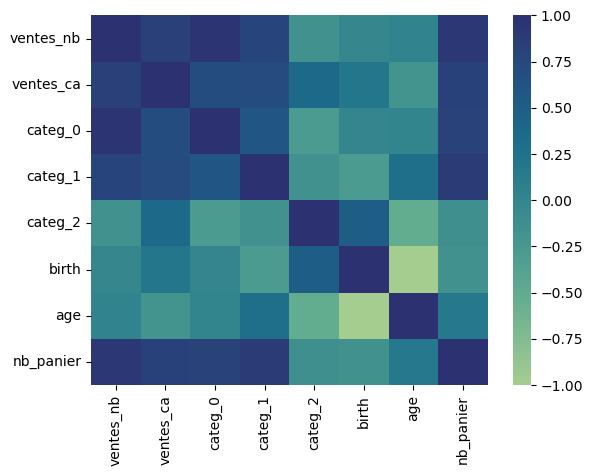

In [376]:
# heatmap de la matrice de corrélation
sns.heatmap(customers_vente_ca_zscore.corr(), cmap="crest")

Ce graphique indique déjà que s'il y a corrélation entre age et ventes_ca, elle sera plutôt faible.

##### Droite de régression
On va maintenant calculer la droite de régression linéaire de la forme y = ax + b + e

In [118]:
a, b, r_value, pvalue, std_err = st.linregress(X, Y)
st.linregress(X, Y)

LinregressResult(slope=-10.629111173830562, intercept=1752.2939336265829, rvalue=-0.18832651564713124, pvalue=1.8592326764549379e-69, stderr=0.5979245382540146, intercept_stderr=28.597856840868488)

In [379]:
print("La droite de régression est y =",round(a,2),"* x +",round(b,2) )

La droite de régression est y = -10.63 * x + 1752.29


In [119]:
# on construit notre équation de droite avec les paramètres obtenus grâce à linregress
x = np.linspace(X.min(), X.max(), len(X))
y = a*x + b

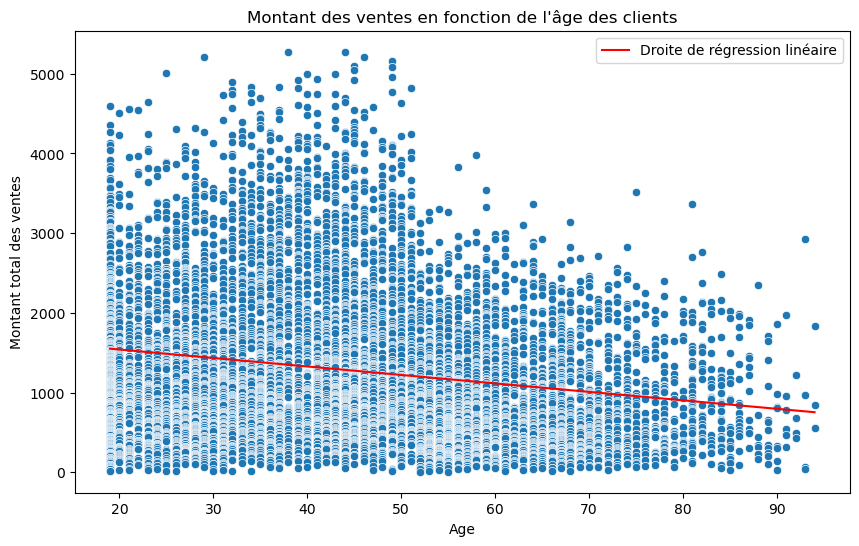

In [120]:
plt.figure(figsize=(10,6))

plt.ylabel('Montant total des ventes')
plt.xlabel('Age')
plt.title("Montant des ventes en fonction de l'âge des clients")

sns.scatterplot(X, Y)
plt.plot(x, y, c='r', label='Droite de régression linéaire')

plt.legend()

plt.show()

##### Coefficient de variation r²

In [121]:
# calculé avec le carré des valeurs résiduelles
r_value**2

0.03546687649578917

Cela signifie que 3.55% des variations de la variable cible (le montant total des ventes dans notre cas) sont expliquées par le modèle. Le modèle explique un faible pourcentage de la variable cible, il pourrait encore être amélioré.

##### Calcul des résidus

In [122]:
# création du dataframe des résidus
dictionnaire_residus={'vente_ca_echantillon': np.array(Y), 'vente_ca_regression': y}
df_calcul_residus = pd.DataFrame(dictionnaire_residus)

# création de la variable résidus
df_calcul_residus['residus']=df_calcul_residus['vente_ca_echantillon']-df_calcul_residus['vente_ca_regression']

# Calcul de la moyenne et de l'écart type des résidus
std_residus=np.std(df_calcul_residus['residus'])
mean_residus=np.mean(df_calcul_residus['residus'])

# Création et calcul des résidus normalisés
df_calcul_residus['residus_norm']=(df_calcul_residus['residus']-mean_residus)/std_residus
df_calcul_residus

,vente_ca_echantillon,vente_ca_regression,residus,residus_norm
0,5276.87,1550.340821,3726.529179,4.838955
1,5271.62,1550.248072,3721.371928,4.832026
2,5214.05,1550.155322,3663.894678,4.754800
3,5208.82,1550.062572,3658.757428,4.747898
4,5155.77,1549.969823,3605.800177,4.676746
...,...,...,...,...
8591,11.20,753.528482,-742.328482,-1.165332
8592,11.06,753.435732,-742.375732,-1.165395
8593,9.98,753.342983,-743.362983,-1.166722
8594,8.30,753.250233,-744.950233,-1.168854


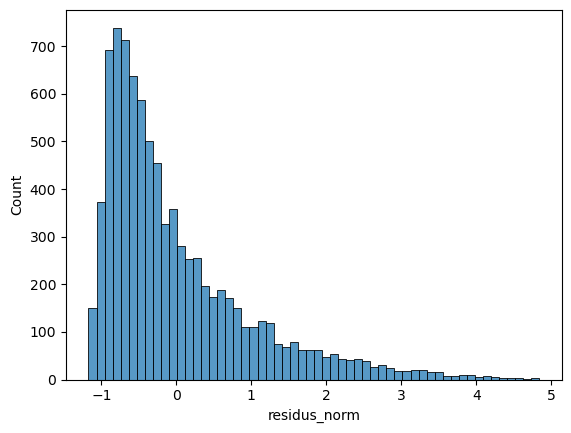

In [125]:
sns.histplot(df_calcul_residus['residus_norm']);

In [126]:
# les résidus normalisés ne suivent pas une loi normale, cela confirme que le modèle peut être amélioré
st.shapiro(df_calcul_residus['residus_norm'])

ShapiroResult(statistic=0.8404821157455444, pvalue=0.0)

##### Droite de régression avec statsmodels

In [444]:
customers_vente_ca_zscore['intercept']=1
X=customers_vente_ca_zscore[['age', 'intercept']]
Y=customers_vente_ca_zscore['ventes_ca']
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ventes_ca   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     316.0
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.86e-69
Time:                        17:30:31   Log-Likelihood:                -71020.
No. Observations:                8596   AIC:                         1.420e+05
Df Residuals:                    8594   BIC:                         1.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -10.6291      0.598    -17.777      0.000     -11.801      -9.457
intercept   1752.2939     28.598     61.274      0.000    1696.235    1808.353
==============================================================================
Omnibus:                     1371.454   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2169.072
Skew:                           1.111   Prob(JB):                         0.00
Kurtosis:                       4.057   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On retrouve notre équation de droite : y = -10.6291 * x + 1752.2939 et le r_squared = 0.035

In [455]:
# on teste la normalité des résidus
st.shapiro(results.resid)

ShapiroResult(statistic=0.9178572297096252, pvalue=0.0)

On arrive à la même conclusion, les résidus ne suivent pas une loi normal. Un des prérequis de la régression linéaire n'est pas rempli donc il faut retravailler le modèle.

##### Transformation au logarithme

In [459]:
customers_vente_ca_zscore['intercept']=1
X=customers_vente_ca_zscore[['age', 'intercept']]
Y = np.log(customers_vente_ca_zscore['ventes_ca'])

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ventes_ca   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     299.5
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           5.62e-66
Time:                        21:45:52   Log-Likelihood:                -11028.
No. Observations:                8596   AIC:                         2.206e+04
Df Residuals:                    8594   BIC:                         2.207e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0096      0.001    -17.305      0.000      -0.011      -0.009
intercept      7.2623      0.027    272.699      0.000       7.210       7.314
==============================================================================
Omnibus:                      988.939   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1535.088
Skew:                          -0.832   Prob(JB):                         0.00
Kurtosis:                       4.230   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [461]:
st.shapiro(results.resid)

ShapiroResult(statistic=0.9630619287490845, pvalue=3.836755195321349e-42)

Malgré la transformation, les résidus ne suivent pas une loi normale.

##### Conclusion test de régression

<a id='age_frequence' ></a>
### 3. Lien entre l’âge des clients et la fréquence d’achat (coefficient de pearson, test de régression)<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

<a id='age_panier' ></a>
### 4. Lien entre l’âge des clients et la taille du panier moyen (coefficient de pearson, test de régression)<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

<a id='age_categ' ></a>
### 5. Lien entre l’âge des clients et les catégories des livres achetés<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Nous allons étudier les corrélations entre ces 2 variables. Nous avons l'âge qui est une variable quantitative et la catégorie qui est une variable qualitative. Nous pouvons donc ici effectuer une ANOVA.

L'analyse de variance (ANOVA) est une méthode statistique utilisée pour comparer la moyenne de trois groupes ou plus. Elle permet de déterminer si les différences entre les moyennes observées sont statistiquement significatives ou simplement le résultat du hasard.

Les prérequis pour effectuer une ANOVA sont les suivants :

- Les données doivent être continues et normalement distribuées dans chaque groupes.

- L'homogénéité des variances : les variances de chaque groupes doivent être égales.

- Indépendance des échantillons : les échantillons doivent être indépendants les uns des autres. Cela signifie que les données ne doivent pas être corrélées ou appariées.

Nous allons vérifier ces prérequis avant d'effectuer l'ANOVA.

In [171]:
# création d'un df pour chaque catégorie, pour les analyser indépendamment 
categ_0=customers.loc[customers['categ_0']!=0, ['client_id', 'age', 'categ_0']]
categ_1=customers.loc[customers['categ_1']!=0, ['client_id', 'age', 'categ_1']]
categ_2=customers.loc[customers['categ_2']!=0, ['client_id', 'age', 'categ_2']]

In [172]:
stat_var(categ_0['age'])

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore,echantillon_base_log,log_IQR,log_zscore,echantillon_base_sqrt,sqrt_IQR,sqrt_zscore
moyenne,46.3654,46.3473,46.3654,3.7681,3.7681,3.7681,6.6975,6.6975,6.6975
moyenne_min,41.7288,41.7125,41.7288,3.3913,3.3913,3.3913,6.0277,6.0277,6.0277
moyenne_max,51.0019,50.982,51.0019,4.145,4.145,4.145,7.3672,7.3672,7.3672
test_moyenne_10_pourcents,True,True,True,True,True,True,True,True,True
mediane,45.0,45.0,45.0,3.8067,3.8067,3.8067,6.7082,6.7082,6.7082
mode,19,19,19,2.9444,2.9444,2.9444,4.3589,4.3589,4.3589
moyenne_tronquee,45.932,45.9198,45.932,3.7784,3.7784,3.7784,6.6973,6.6973,6.6973
ecart_type,16.4534,16.4303,16.4534,0.3813,0.3813,0.3813,1.2286,1.2286,1.2286
CV,0.3549,0.3545,0.3549,0.1012,0.1012,0.1012,0.1834,0.1834,0.1834
IQR,24.0,24.0,24.0,0.5341,0.5341,0.5341,1.7848,1.7848,1.7848


In [173]:
stat_var(categ_1['age'])

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore,echantillon_base_log,log_IQR,log_zscore,echantillon_base_sqrt,sqrt_IQR,sqrt_zscore
moyenne,44.8933,44.8933,44.8933,3.7284,3.7284,3.7284,6.5779,6.5779,6.5779
moyenne_min,40.404,40.404,40.404,3.3556,3.3556,3.3556,5.9201,5.9201,5.9201
moyenne_max,49.3826,49.3826,49.3826,4.1013,4.1013,4.1013,7.2357,7.2357,7.2357
test_moyenne_10_pourcents,True,True,True,True,True,True,True,True,True
mediane,44.0,44.0,44.0,3.7842,3.7842,3.7842,6.6332,6.6332,6.6332
mode,19,19,19,2.9444,2.9444,2.9444,4.3589,4.3589,4.3589
moyenne_tronquee,44.3325,44.3325,44.3325,3.7351,3.7351,3.7351,6.5672,6.5672,6.5672
ecart_type,16.8852,16.8852,16.8852,0.3999,0.3999,0.3999,1.2744,1.2744,1.2744
CV,0.3761,0.3761,0.3761,0.1073,0.1073,0.1073,0.1937,0.1937,0.1937
IQR,26.0,26.0,26.0,0.6091,0.6091,0.6091,1.9821,1.9821,1.9821


In [174]:
stat_var(categ_2['age'])

Voici un tableau présentant les résultats des tests de représentativité, de forme et de normalité de l'échantillon


,echantillon_base,echantillon_base_IQR,echantillon_base_zscore,echantillon_base_log,log_IQR,log_zscore,echantillon_base_sqrt,sqrt_IQR,sqrt_zscore
moyenne,35.3867,34.4487,35.0355,3.4745,3.4745,3.4745,5.8104,5.8072,5.8082
moyenne_min,31.848,31.0038,31.532,3.1271,3.1271,3.1271,5.2293,5.2264,5.2274
moyenne_max,38.9254,37.8936,38.5391,3.822,3.822,3.822,6.3914,6.3879,6.389
test_moyenne_10_pourcents,False,False,False,True,True,True,True,True,True
mediane,29.0,29.0,29.0,3.3673,3.3673,3.3673,5.3852,5.3852,5.3852
mode,19,19,19,2.9444,2.9444,2.9444,4.3589,4.3589,4.3589
moyenne_tronquee,34.0253,33.3265,33.7799,3.4564,3.4564,3.4564,5.729,5.7267,5.7274
ecart_type,16.2482,14.9329,15.724,0.4161,0.4161,0.4161,1.2755,1.2712,1.2726
CV,0.4592,0.4335,0.4488,0.1198,0.1198,0.1198,0.2195,0.2189,0.2191
IQR,22.0,21.0,22.0,0.6712,0.6712,0.6712,1.9124,1.9124,1.9124


On peut déjà voir qu'aucun des groupes par catégorie ne suit une distribution normal, avec ou sans transformations.

On continue tout de même le test de l'Anova pour l'exercice.


Concernant les indicateurs du tableau, on voit déjà que la catégorie 2 diffère des 2 autres au niveau de la moyenne, du test des 10%, des outliers, du skewness et du kurtosis.
Les 2 autres sont assez similaires concernant ces indicateurs statistiques.

#### Première représentation

In [205]:
# création d'un array pour chaque categorie
tab_categ_0=np.array(categ_0['age'])
tab_categ_1=np.array(categ_1['age'])
tab_categ_2=np.array(categ_2['age'])

In [176]:
tab_categ=np.array([tab_categ_0, tab_categ_1, tab_categ_2])
tab_categ

array([array([68, 67, 31, ..., 29, 22, 59], dtype=int64),
       array([68, 67, 31, ..., 29, 22, 59], dtype=int64),
       array([68, 67, 31, ..., 21, 29, 22], dtype=int64)], dtype=object)

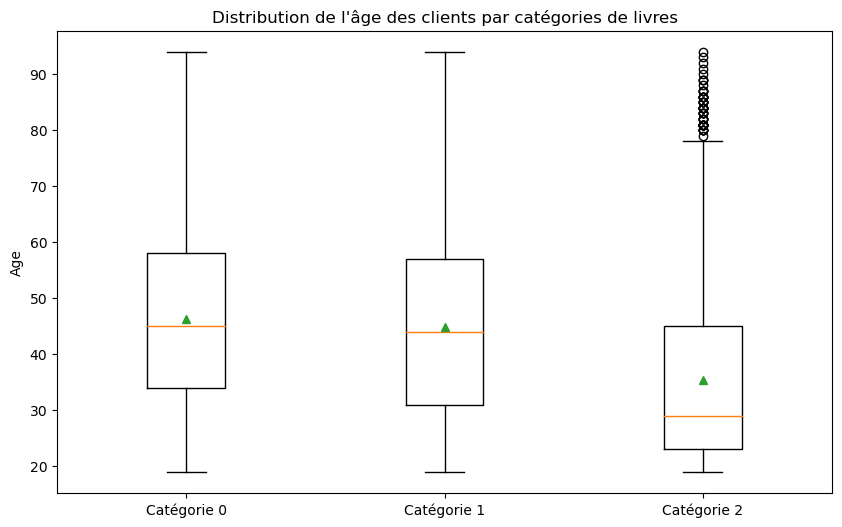

In [319]:
plt.figure(figsize=(10, 6))

plt.title("Distribution de l'âge des clients par catégories de livres")
plt.ylabel('Age')

plt.boxplot(tab_categ, showmeans=True)

plt.xticks([1, 2, 3], ['Catégorie 0', 'Catégorie 1', 'Catégorie 2'])

plt.show()

Les variables âge et catégories semblent être liées, en effet, la distribution de l'âge des clients semblent être différente entre catégorie, en particulier dans la catégorie 2.

Nous allons vérifier cela par le calcul.

#### Test d'égalité des variances
On va comparer les variances de chaque sous groupe

Nous effectuons le test de Levene avec :

- H0 : Les variances des sous groupes sont égales
- H1 : Les variances des sous groupes sont différentes

alpha=5%

In [178]:
# on utilise le test de levene car il est plus adapté pour des échantillons ne suivant pas une loi normale
# sinon on aurait pu utiliser le test de barlett
st.levene(tab_categ_0, tab_categ_1, tab_categ_2)

LeveneResult(statistic=41.01507534560942, pvalue=1.6746060722753105e-18)

pvalue=1.6746060722753105e-18 << 0.05, on rejette H0 donc on considère que les variances des sous groupes sont différentes.

#### Test d'égalité des moyennes, test de l'Anova
On va comparer les moyennes de chaque sous groupe

Nous effectuons le test de one_way ANOVA avec :

- H0 : Les moyennes des sous groupes sont égales
- H1 : Les moyennes des sous groupes sont différentes

alpha=5%

In [179]:
st.f_oneway(tab_categ_0, tab_categ_1, tab_categ_2)

F_onewayResult(statistic=574.4575957876114, pvalue=2.7416118400332536e-243)

pvalue=2.7416118400332536e-243 << 0.05, on rejette H0 donc on considère que les moyennes des sous groupes sont différentes.

Cela confirme notre hypothèse de départ.

Un des prérequis de ce test est que la distribution des échantillons doivent suivre une loi normale, ce n'est pas notre cas. 
De plus, les transformations au logarithme et à la racine n'ont pas fonctionné.

On peut passer le test de Kruskal Wallis à la place qui est un test d'hypothèse sur la médiane. C'est la version non paramétrique de l'ANOVA.

#### Test d'égalité des médiane, test de Kruskal-Wallis (non paramétrique)

Nous effectuons le test de Kruskal-Wallis  avec :

- H0 : Les distributions des sous groupes sont égales
- H1 : Les distributions des sous groupes sont inégales

alpha=5%

In [180]:
st.kruskal(tab_categ_0, tab_categ_1, tab_categ_2)

KruskalResult(statistic=1250.0537254083356, pvalue=3.583294362312409e-272)

pvalue=3.583294362312409e-272 << 0.05, on rejette H0 donc on considère que les différences de distributions entre les groupes sont statistiquement significatives.

Cela confirme notre hypothèse de départ.

#### Calcul de eta_squared

L'eta_squared est un indicateur sur l'effet de la variable indépendante (catégorie) sur la variable dépendante (âge).
Il indique la proportion de variance dans la variable dépendante qui est expliquée par la variable indépendante.

In [206]:
tab_tot=customers['age'].values
mean_age_tot=customers['age'].mean()
mean_age_categ_0=tab_categ_0.mean()
mean_age_categ_1=tab_categ_1.mean()
mean_age_categ_2=tab_categ_2.mean()

In [210]:
# Variation totale
SST = np.sum((tab_tot-mean_age_tot)**2)
SST

2458505.5158139532

In [211]:
# Variation interclasse
SCE = (mean_age_categ_0 - mean_age_tot)**2 + (mean_age_categ_1 - mean_age_tot)**2 + (mean_age_categ_2 - mean_age_tot)**2
SCE

90.13878658131758

In [212]:
# Eta_squared
eta_squared = SCE/SST
eta_squared

3.6664057087329635e-05

Cette valeur indique que la variable indépendante (catégorie) n'a aucun effet sur la variable dépendante (l'âge) en terme de variance.

Le fait que l'eta_squared soit proche de 0 et que l'ANOVA a rejetée l'hypothèse nulle suggère que bien que les différences entre les moyennes des groupes soient statistiquement significatives, la variable de groupe (ici catégorie) a peu d'effet sur la variance totale des données.

In [ ]:
# on fait un melt avec le df customers pour faciliter le traitement et les visualisations
customers_melt=pd.melt(customers,
        id_vars=['client_id', 'ventes_nb', 'ventes_ca',
       'sex', 'birth', 'age', 'nb_panier', 'panier_moyen'],
       value_vars=['categ_0', 'categ_1', 'categ_2'],
       var_name='categ',
       value_name='nb_categ')

customers_melt.loc[customers_melt['categ']=='categ_0', 'categ']=0
customers_melt.loc[customers_melt['categ']=='categ_1', 'categ']=1
customers_melt.loc[customers_melt['categ']=='categ_2', 'categ']=2

customers_melt['categ']=customers_melt['categ'].astype('category')

customers_melt.drop(customers_melt[customers_melt['nb_categ']==0].index, inplace=True)

#### Conclusion de l'ANOVA

Le test d'ANOVA indique que les inégalités de moyenne entre les groupes sont statistiquement significatives. Cependant, ce résultat est à prendre avec des pincettes étant donné que tous les prérequis n'étaient pas validés.

Le test de Kruskal-Wallis (non paramétrique) n'avait pas pour prérequis que les groupes suivent une distribution normale et son résultat indique que les différences de distributions entre les groupes sont statistiquement significatives.

La valeur de l'eta_squared indique que la variable de groupe (ici catégorie) a peu d'effet sur la variance totale des données.


Cependant, les graphiques montrent que la catégorie 2 dénote des 2 autres, on a part exemple 50% des clients pour les livres de la catégorie 2 qui ont 29 ans ou moins alors que cette tranche d'âge représente 17 et 22% des clients des catégories 0 et 1. 

On a environ 50% des clients qui ont entre 35 et 60 ans pour la catégorie 0 et 1 et seulement 25% sur cette tranche d'âge pour la catégorie 2.

Le point commun des 3 catégories est que l'âge le plus fréquent pour un client est 19 ans.

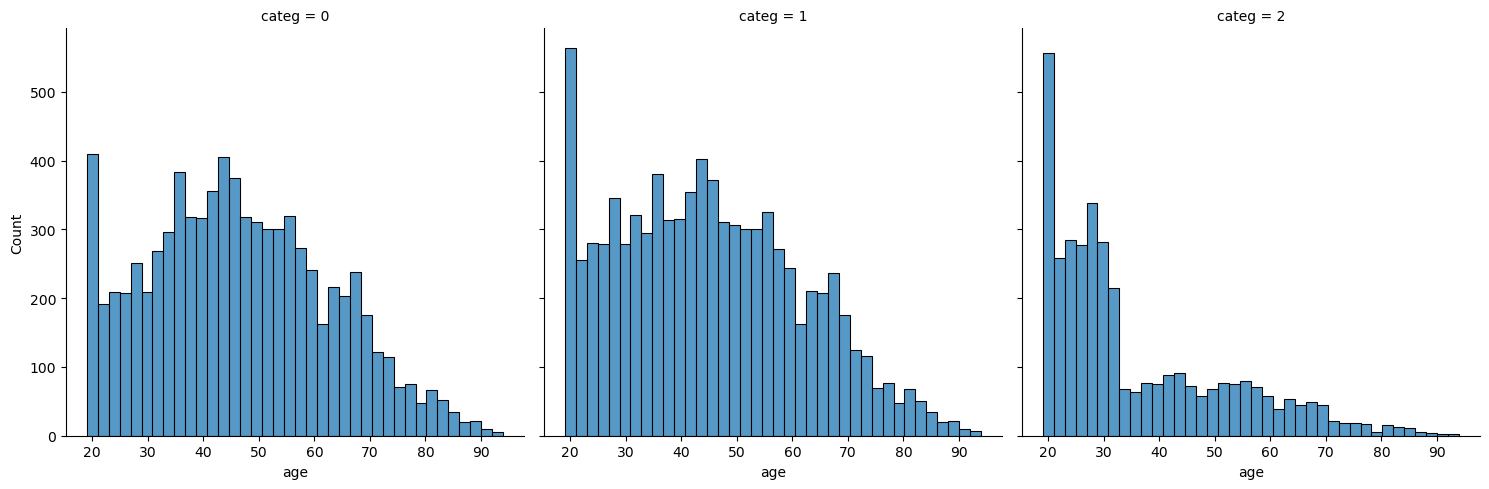

In [305]:
sns.displot(customers_melt, x='age', col='categ')

In [340]:
# Justification conclusion

# médiane catégorie 2
customers_melt.loc[customers_melt['categ']==2, 'age'].median()

# proportion categ 0 < ou égale 29 ans
len(customers_melt.loc[(customers_melt['categ']==0) & (customers_melt['age']<=29), 'age'])/len(customers_melt.loc[customers_melt['categ']==0, :])

# proportion categ 1 < ou égale 29 ans
len(customers_melt.loc[(customers_melt['categ']==1) & (customers_melt['age']<=29), 'age'])/len(customers_melt.loc[customers_melt['categ']==1, :])

# proportion tranche d'age 35 --> 60 ans dans la catégorie 0
len(customers_melt.loc[(customers_melt['categ']==0) & (customers_melt['age']>35) & (customers_melt['age']<60), 'age'])/len(customers_melt.loc[customers_melt['categ']==0, :])

# proportion tranche d'age 35 --> 60 ans dans la catégorie 1
len(customers_melt.loc[(customers_melt['categ']==1) & (customers_melt['age']>35) & (customers_melt['age']<60), 'age'])/len(customers_melt.loc[customers_melt['categ']==1, :])

# proportion tranche d'age 35 --> 60 ans dans la catégorie 2
len(customers_melt.loc[(customers_melt['categ']==2) & (customers_melt['age']>35) & (customers_melt['age']<60), 'age'])/len(customers_melt.loc[customers_melt['categ']==2, :])

# Age le plus fréquent dans la catégorie 0
customers_melt.loc[customers_melt['categ']==0, 'age'].value_counts().index[0]

# Age le plus fréquent dans la catégorie 1
customers_melt.loc[customers_melt['categ']==1, 'age'].value_counts().index[0]

# Age le plus fréquent dans la catégorie 2
customers_melt.loc[customers_melt['categ']==2, 'age'].value_counts().index[0]

19

# Brouillon

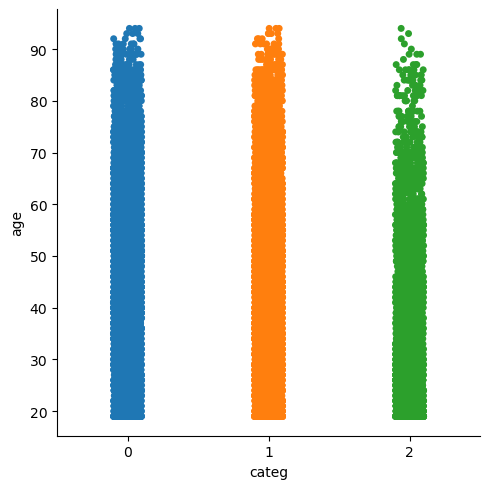

In [302]:
sns.catplot(data=customers_melt, x='categ', y='age')

<AxesSubplot:xlabel='categ', ylabel='age'>

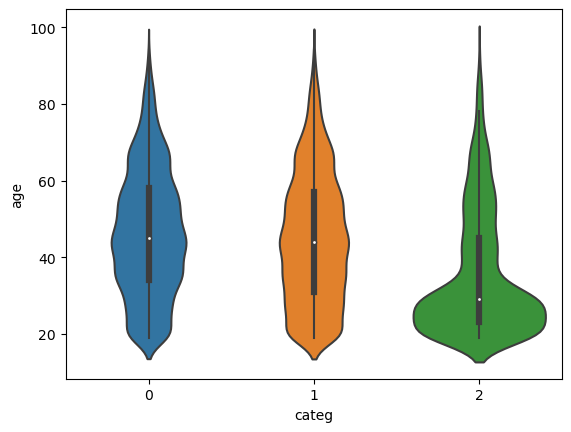

In [303]:
sns.violinplot(data=customers_melt, x='categ', y='age')

<AxesSubplot:xlabel='categ', ylabel='age'>

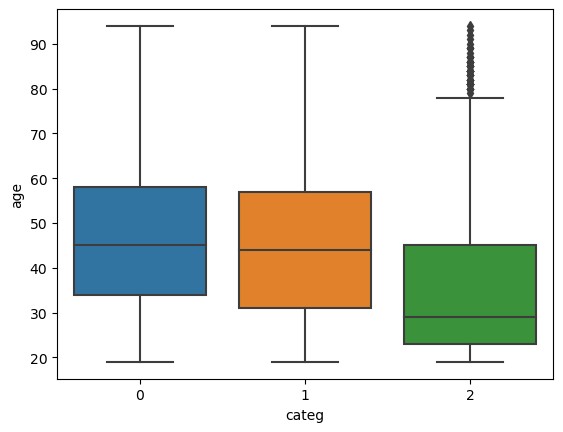

In [304]:
sns.boxplot(data=customers_melt, x='categ', y='age')

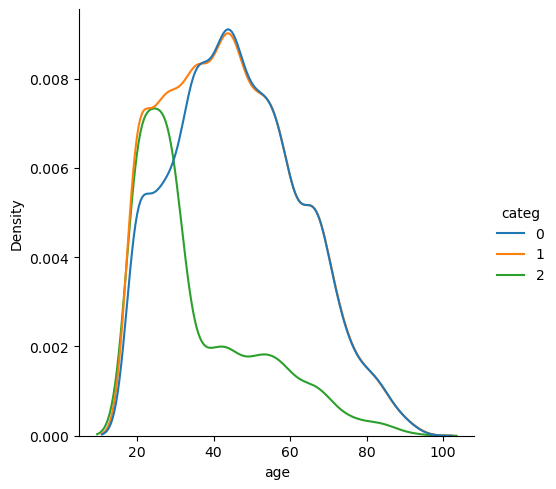

In [312]:
sns.displot(customers_melt, x='age', hue='categ', kind='kde')

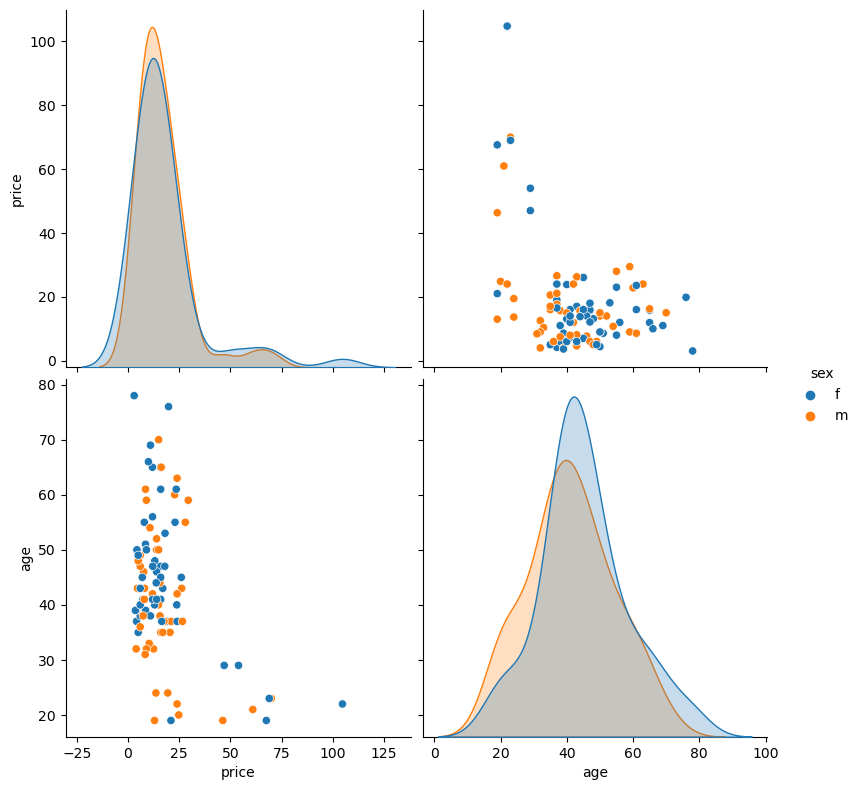

In [232]:
sns.pairplot(df.iloc[:100, [0,1,2,3,4,5,6,8]], hue='sex', height=4)

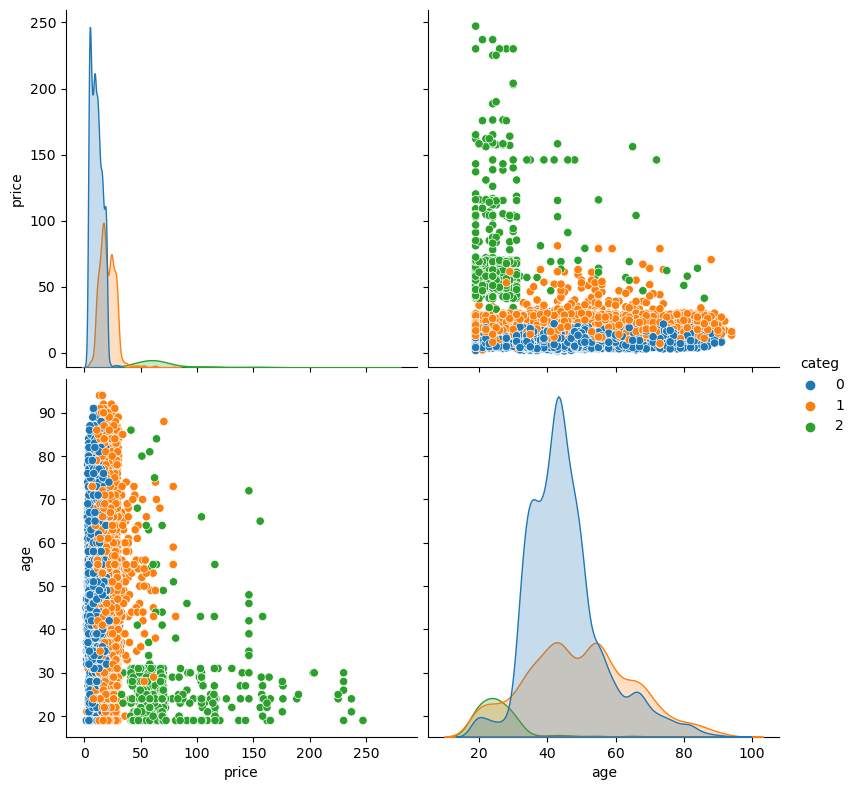

In [231]:
sns.pairplot(df.iloc[:10000, [0,1,2,3,4,5,6,8]], hue='categ', height=4)

In [233]:
customers

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91
1,c_10,58,1353.60,20,34,4,m,1956,67,34,39.81
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97
3,c_1000,125,2261.89,43,82,0,f,1966,57,93,24.32
4,c_1001,102,1812.86,70,31,1,m,1982,41,47,38.57
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,14,189.41,11,3,0,m,1955,68,9,21.05
8596,c_996,95,1625.58,40,55,0,f,1970,53,79,20.58
8597,c_997,59,1490.01,23,21,15,f,1994,29,24,62.08
8598,c_998,53,2779.88,14,11,28,m,2001,22,23,120.86


<AxesSubplot:xlabel='age', ylabel='nb_panier'>

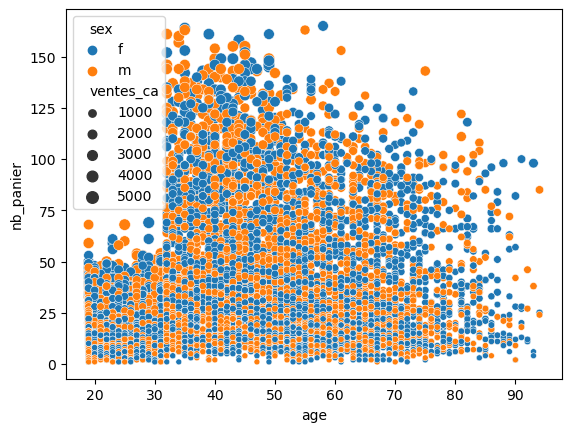

In [242]:
sns.scatterplot(data=customers_vente_ca_zscore, x='age', y='nb_panier', hue='sex', size='ventes_ca')

<AxesSubplot:xlabel='age', ylabel='nb_panier'>

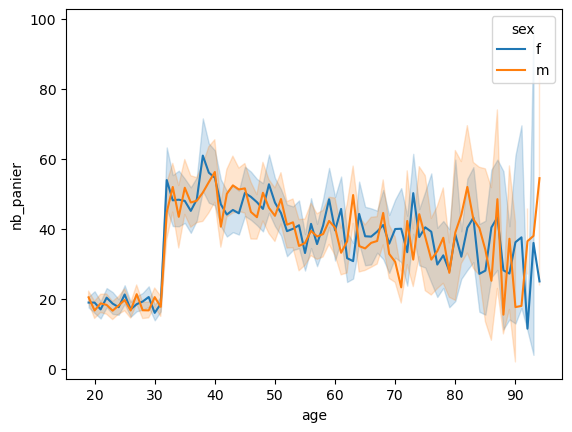

In [239]:
sns.lineplot(data=customers_vente_ca_zscore, x='age', y='nb_panier', hue='sex')

In [240]:
customers

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91
1,c_10,58,1353.60,20,34,4,m,1956,67,34,39.81
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97
3,c_1000,125,2261.89,43,82,0,f,1966,57,93,24.32
4,c_1001,102,1812.86,70,31,1,m,1982,41,47,38.57
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,14,189.41,11,3,0,m,1955,68,9,21.05
8596,c_996,95,1625.58,40,55,0,f,1970,53,79,20.58
8597,c_997,59,1490.01,23,21,15,f,1994,29,24,62.08
8598,c_998,53,2779.88,14,11,28,m,2001,22,23,120.86


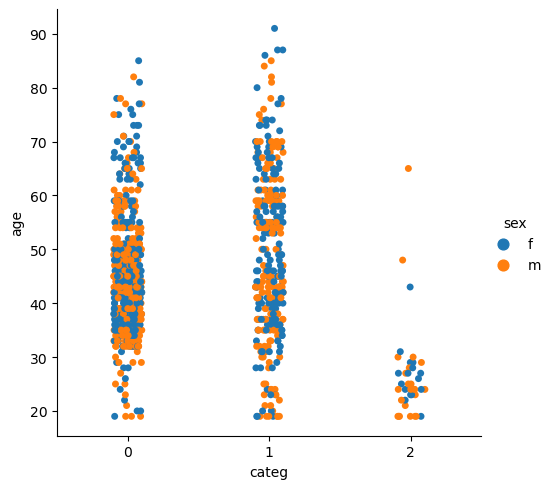

In [243]:
sns.catplot(data= df.iloc[:1000, [0,1,2,3,4,5,6,8]], x='categ', y='age', hue='sex')

<AxesSubplot:xlabel='categ', ylabel='age'>

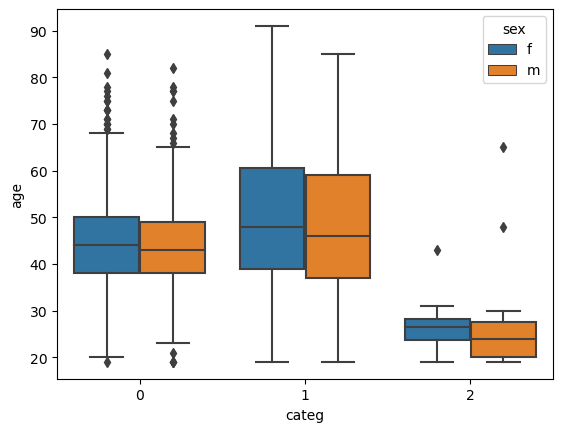

In [244]:
sns.boxplot(data= df.iloc[:1000, [0,1,2,3,4,5,6,8]], x='categ', y='age', hue='sex')

<AxesSubplot:xlabel='categ', ylabel='price'>

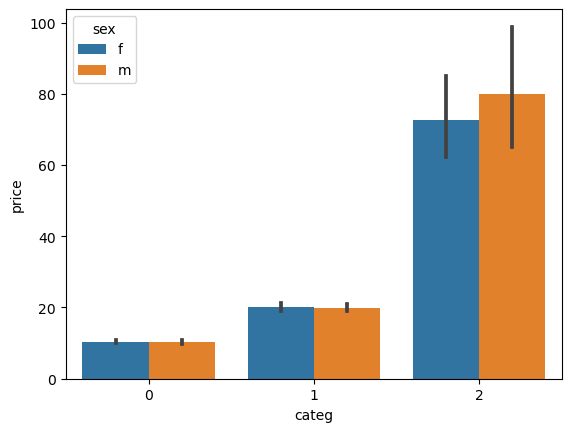

In [254]:
sns.barplot(data= df.iloc[:1000, [0,1,2,3,4,5,6,8]], x='categ', y='price', hue='sex')

<AxesSubplot:xlabel='price', ylabel='Density'>

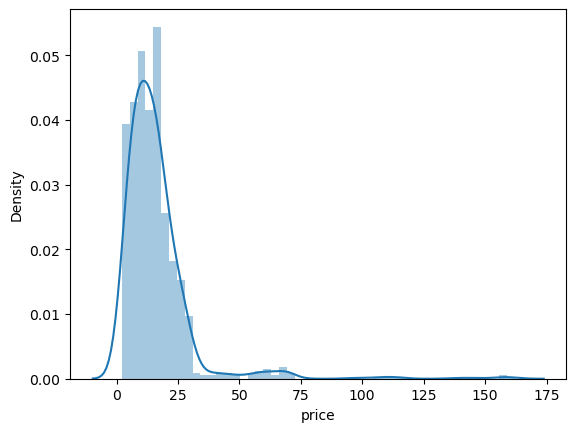

In [255]:
sns.distplot(df.iloc[:1000, [0,1,2,3,4,5,6,8]]['price'])

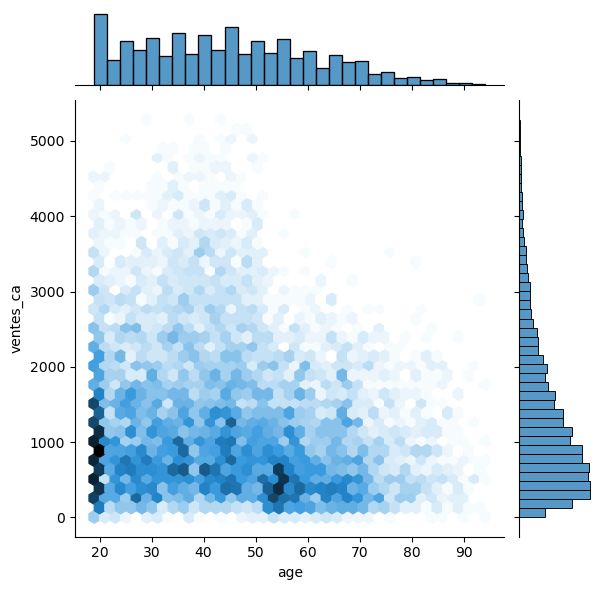

In [261]:
sns.jointplot(data=customers_vente_ca_zscore, x='age', y='ventes_ca', kind='hex')

<AxesSubplot:>

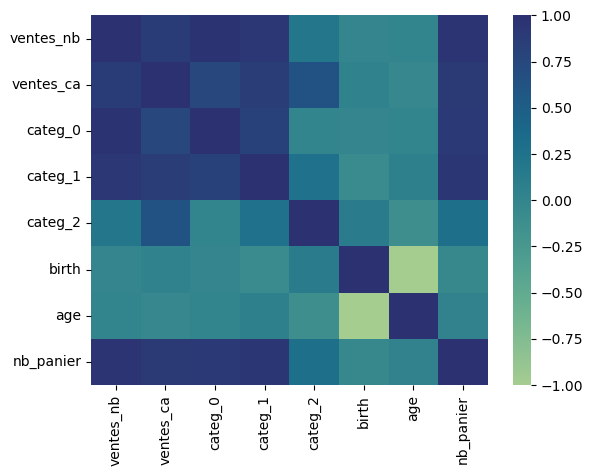

In [265]:
sns.heatmap(customers.corr(), cmap="crest")

In [267]:
customers

,client_id,ventes_nb,ventes_ca,categ_0,categ_1,categ_2,sex,birth,age,nb_panier,panier_moyen
0,c_1,39,558.18,30,8,1,m,1955,68,33,16.91
1,c_10,58,1353.60,20,34,4,m,1956,67,34,39.81
2,c_100,8,254.85,2,5,1,m,1992,31,5,50.97
3,c_1000,125,2261.89,43,82,0,f,1966,57,93,24.32
4,c_1001,102,1812.86,70,31,1,m,1982,41,47,38.57
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,14,189.41,11,3,0,m,1955,68,9,21.05
8596,c_996,95,1625.58,40,55,0,f,1970,53,79,20.58
8597,c_997,59,1490.01,23,21,15,f,1994,29,24,62.08
8598,c_998,53,2779.88,14,11,28,m,2001,22,23,120.86


In [270]:
customers_melt=pd.melt(customers,
        id_vars=['client_id', 'ventes_nb', 'ventes_ca',
       'sex', 'birth', 'age', 'nb_panier', 'panier_moyen'],
       value_vars=['categ_0', 'categ_1', 'categ_2'],
       var_name='categ',
       value_name='nb_categ')
customers_melt

,client_id,ventes_nb,ventes_ca,sex,birth,age,nb_panier,panier_moyen,categ,nb_categ
0,c_1,39,558.18,m,1955,68,33,16.91,categ_0,30
1,c_10,58,1353.60,m,1956,67,34,39.81,categ_0,20
2,c_100,8,254.85,m,1992,31,5,50.97,categ_0,2
3,c_1000,125,2261.89,f,1966,57,93,24.32,categ_0,43
4,c_1001,102,1812.86,m,1982,41,47,38.57,categ_0,70
...,...,...,...,...,...,...,...,...,...,...
25795,c_995,14,189.41,m,1955,68,9,21.05,categ_2,0
25796,c_996,95,1625.58,f,1970,53,79,20.58,categ_2,0
25797,c_997,59,1490.01,f,1994,29,24,62.08,categ_2,15
25798,c_998,53,2779.88,m,2001,22,23,120.86,categ_2,28


In [276]:
customers_melt.sort_values('client_id')

,client_id,ventes_nb,ventes_ca,sex,birth,age,nb_panier,panier_moyen,categ,nb_categ
0,c_1,39,558.18,m,1955,68,33,16.91,0,30
17200,c_1,39,558.18,m,1955,68,33,16.91,categ_2,1
8600,c_1,39,558.18,m,1955,68,33,16.91,categ_1,8
1,c_10,58,1353.60,m,1956,67,34,39.81,0,20
17201,c_10,58,1353.60,m,1956,67,34,39.81,categ_2,4
...,...,...,...,...,...,...,...,...,...,...
8598,c_998,53,2779.88,m,2001,22,23,120.86,0,14
17198,c_998,53,2779.88,m,2001,22,23,120.86,categ_1,11
17199,c_999,46,701.40,m,1964,59,42,16.70,categ_1,27
8599,c_999,46,701.40,m,1964,59,42,16.70,0,19


In [277]:
customers_melt.loc[customers_melt['categ']=='categ_0', 'categ']=0
customers_melt.loc[customers_melt['categ']=='categ_1', 'categ']=1
customers_melt.loc[customers_melt['categ']=='categ_2', 'categ']=2

In [294]:
customers_melt['categ']=customers_melt['categ'].astype('category')

In [299]:
customers_melt['categ'].value_counts()

0    8600
1    8600
2    8600
Name: categ, dtype: int64

In [300]:
customers_melt.drop(customers_melt[customers_melt['nb_categ']==0].index, inplace=True)

In [301]:
customers_melt['categ'].value_counts()

1    8453
0    7896
2    3597
Name: categ, dtype: int64